# Data Preparations

## Original Spotify Dataset

In [11]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk'

    return path


In [13]:
import pandas as pd

# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk/view?usp=sharing'

# Generate the direct download link
csv_path1 = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df_original = pd.read_csv(csv_path1)

# Display the first few rows to confirm it's loaded correctly
df_original.head()

# Get an overview of the dataset
df_original.info()

# Check for missing values
df_original.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
df_original.track_genre.value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [15]:
df_original.track_genre.describe()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object

In [16]:
df_original.track_genre.value_counts(normalize = True )

track_genre
acoustic             0.008772
punk-rock            0.008772
progressive-house    0.008772
power-pop            0.008772
pop                  0.008772
                       ...   
folk                 0.008772
emo                  0.008772
electronic           0.008772
electro              0.008772
world-music          0.008772
Name: proportion, Length: 114, dtype: float64

At the beggining the dataset is balanced but later on you will see it gets very imbalanced after cleaning the data.

**This is the original spotify dataset from kaggle.**
There are 21 columns (including unnamed:0 which is not related to the data in any way and track_genre which is the target variable in this current classification project).

**Now lets inspect the final_clean_dataset after full EDA :**

(in accordance to a different buisness question focusing on finding connection between popularity and happiness if happiness relys on tempo and valence features)

## Load and inspect dataset after full EDA

**Option 1, Activate the final_clean_dataset.csv (also this file is an extraction from the full EDA shown in notebook B on the github respiratory https://github.com/ortall0201/Spotify_Classification_genres/tree/main/approach_B_notebook.ipynb) using a csv_drive_path_generator function, this will open the final_clean_dataset.csv directly.**

In [17]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=1WCubeFjuhsaxnYOXjTBEa218v7_WMGvN'

    return path


In [19]:
# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/1WCubeFjuhsaxnYOXjTBEa218v7_WMGvN/view?usp=sharing'

# Generate the direct download link
csv_path2 = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df = pd.read_csv(csv_path2)

# Show the first few rows of the dataset
print(df.head())

# Get an overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Count the number of duplicate track_id entries
duplicate_count = df['track_id'].duplicated().sum()

print(f"Number of duplicate track_id entries: {duplicate_count}")

# Check for duplicate rows in the entire dataset
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")


                              track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   

                   artists                             album_name  popularity  \
0     Sam Smith;Kim Petras              Unholy (feat. Kim Petras)       100.0   
1         Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52        99.0   
2  David Guetta;Bebe Rexha                        I'm Good (Blue)        98.0   
3            Manuel Turizo                             La Bachata        98.0   
4  David Guetta;Bebe Rexha                        I'm Good (Blue)        98.0   

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0     156943.0     False         

**In the final_clean_dataset we see these are 20 columns.** (including track_genre, removed only unnamed:0 which was irrelevant)

**Also we see there are 7457 duplicates track_id** -
The duplicates are a significant portion of the final_clean_dataset.

In the last EDA (focused on specific features like popularity, tempo and valence) the data was cleaned in a way that helps keeping duplicate track_id that has different data in these specific columns.
So we know that there are duplicates, and now that the buisness question has changes, we now care about all features and want to explore while removing NOISE such as duplicates.

BUT removing NOISE, will necesserily mean that we remove a lot of data so first we want to check for the VARIANCE within these duplicates, in order to decide wether to remove them or not.

Removing one row could lead to losing important variance that could impact how well the model learns to classify genres.

Why It Matters: When building a classification model, you want to maximize the relevant feature information for the model to learn from. Removing rows might oversimplify the data and reduce the performance of the classifier if those differences are important.

In [20]:
# Get all duplicates, keeping all occurrences and sort by track_id
duplicates = df[df.duplicated('track_id', keep=False)].sort_values('track_id')
print(duplicates)


               track_name                track_id          artists  \
146        Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
159        Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
181        Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
83501         Sleigh Ride  00970cTs7LnxWt0d5Qk08m  Ella Fitzgerald   
85136         Sleigh Ride  00970cTs7LnxWt0d5Qk08m  Ella Fitzgerald   
...                   ...                     ...              ...   
87272  Frosty The Snowman  7zrxUrilLtTk4XnT5G7zF8  Ella Fitzgerald   
84690            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
84985            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
80685            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
81140            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   

                            album_name  popularity  duration_ms  explicit  \
146                           Hot Fuss        86.0     222973.0     False   
159  

**Out of 7457 track_id duplicates, we see there are 11753 rows as a result of these duplicates.**

In [21]:
import pandas as pd

# Group by track_id
grouped = duplicates.groupby('track_id')

# Create a list to store results
variance_summary = []

# Loop through each group to check for variance
for track_id, group in grouped:
    # Get the number of duplicates
    num_duplicates = group.shape[0]

    # Calculate variance for numerical columns
    numerical_variance = group.select_dtypes(include='number').var().sum()

    # Get unique values for categorical columns
    categorical_variance = {col: group[col].unique() for col in group.select_dtypes(exclude='number').columns}

    # Append results to the list
    variance_summary.append({
        'track_id': track_id,
        'num_duplicates': num_duplicates,
        'numerical_variance': numerical_variance,
        'categorical_variance': categorical_variance
    })

# Convert the list to a DataFrame
variance_summary_df = pd.DataFrame(variance_summary)

# Display the summary
print(variance_summary_df)


                    track_id  num_duplicates  numerical_variance  \
0     003vvx7Niy0yvhvHt4a68B               3        4.911121e-33   
1     00970cTs7LnxWt0d5Qk08m               2        0.000000e+00   
2     00PBSElFPJbnIcFS7orAm2               4        0.000000e+00   
3     00YwP3wJWiG8IxAA7OS9lo               6        2.666667e-01   
4     00ZGWtUFiGqWuFd7i4OeZV               3        2.312921e-32   
...                      ...             ...                 ...   
4291  7ze8MSZXvWZCH5LQ9BmvyI               2        0.000000e+00   
4292  7znniOrVgnRjxIfwHjA9m6               3        3.697785e-32   
4293  7zo6hLIhyY7zGCR0sWKvth               2        0.000000e+00   
4294  7zrxUrilLtTk4XnT5G7zF8               2        0.000000e+00   
4295  7zubR9uYAWjb5KPZTMm85e               4        0.000000e+00   

                                   categorical_variance  
0     {'track_name': ['Mr. Brightside'], 'track_id':...  
1     {'track_name': ['Sleigh Ride'], 'track_id': ['...  
2     {'t

**We see that 4296 unique duplicates of track_id  have a numerical variance very close to ZERO !
This means that these track_id duplicates are nothing but NOISE** and this is a good reason to remove all 11753 rows related to these duplicates).

The number of unique track_id shows 4296 which is different than before, due to the grouping in this code but as you can see in the block below - this summary addresses all the duplicate track_id.

In [22]:
# Get unique track_ids in the original dataset
all_unique_track_ids = set(duplicates['track_id'].unique())

# Get track_ids from your variance summary DataFrame
summary_track_ids = set(variance_summary_df['track_id'])

# Find missing track_ids (those that are in the original but not in the summary)
missing_track_ids = all_unique_track_ids - summary_track_ids

# Display missing track_ids if any
print("Missing track_ids:", missing_track_ids)


Missing track_ids: set()


In [23]:
# Sum the number of duplicates from the variance summary to check if it matches the total rows
total_duplicate_rows = variance_summary_df['num_duplicates'].sum()
print("Total number of duplicate rows:", total_duplicate_rows)


Total number of duplicate rows: 11753


## Final cleanup before moving forward to classification project

**Removing the duplicates track_id rows:**

(keeping only the first row out of each unique duplicate)

In [24]:
# Remove duplicates, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset='track_id', keep='first')

# Reset the index and drop the old index column
df_cleaned = df_cleaned.reset_index(drop=True)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


print(df_cleaned.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80405 entries, 0 to 80404
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        80405 non-null  object 
 1   track_id          80405 non-null  object 
 2   artists           80405 non-null  object 
 3   album_name        80405 non-null  object 
 4   popularity        80405 non-null  float64
 5   duration_ms       80405 non-null  float64
 6   explicit          80405 non-null  bool   
 7   danceability      80405 non-null  float64
 8   energy            80405 non-null  float64
 9   key               80405 non-null  float64
 10  loudness          80405 non-null  float64
 11  mode              80405 non-null  float64
 12  speechiness       80405 non-null  float64
 13  acousticness      80405 non-null  float64
 14  instrumentalness  80405 non-null  float64
 15  liveness          80405 non-null  float64
 16  valence           80405 non-null  float6

In [29]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [30]:
df_cleaned.columns

Index(['track_name', 'track_id', 'artists', 'album_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [31]:
df_cleaned.describe().T

count           mean            std       min  \
popularity        80405.0      33.489858      20.189401     0.000   
duration_ms       80405.0  230140.012748  115637.084042  8586.000   
danceability      80405.0       0.561828       0.177430     0.000   
energy            80405.0       0.637923       0.256098     0.000   
key               80405.0       5.287955       3.555843     0.000   
loudness          80405.0      -8.489271       5.227270   -49.531   
mode              80405.0       0.635931       0.481171     0.000   
speechiness       80405.0       0.088979       0.115941     0.000   
acousticness      80405.0       0.327676       0.337821     0.000   
instrumentalness  80405.0       0.173719       0.324025     0.000   
liveness          80405.0       0.220087       0.198069     0.000   
valence           80405.0       0.472848       0.263311     0.000   
tempo             80405.0     122.172514      30.174024     0.000   
time_signature    80405.0       3.896847       0.455940     0.000   

                          25%            50%          75%          max  
popularity            20.0000      33.000000      48.0000      100.000  
duration_ms       173277.0000  214253.000000  265800.0000  5237295.000  
danceability           0.4490       0.576000       0.6930        0.985  
energy                 0.4620       0.680000       0.8560        1.000  
key                    2.0000       5.000000       8.0000       11.000  
loudness             -10.3120      -7.171000      -5.0990        4.532  
mode                   0.0000       1.000000       1.0000        1.000  
speechiness            0.0361       0.049300       0.0876        0.965  
acousticness           0.0167       0.188000       0.6230        0.996  
instrumentalness       0.0000       0.000058       0.0985        1.000  
liveness               0.0983       0.134000       0.2840        1.000  
valence                0.2530       0.463000       0.6860        0.995  
tempo                 99.3750     122.031000     140.1120      243.372  
time_signature         4.0000       4.000000       4.0000        5.000

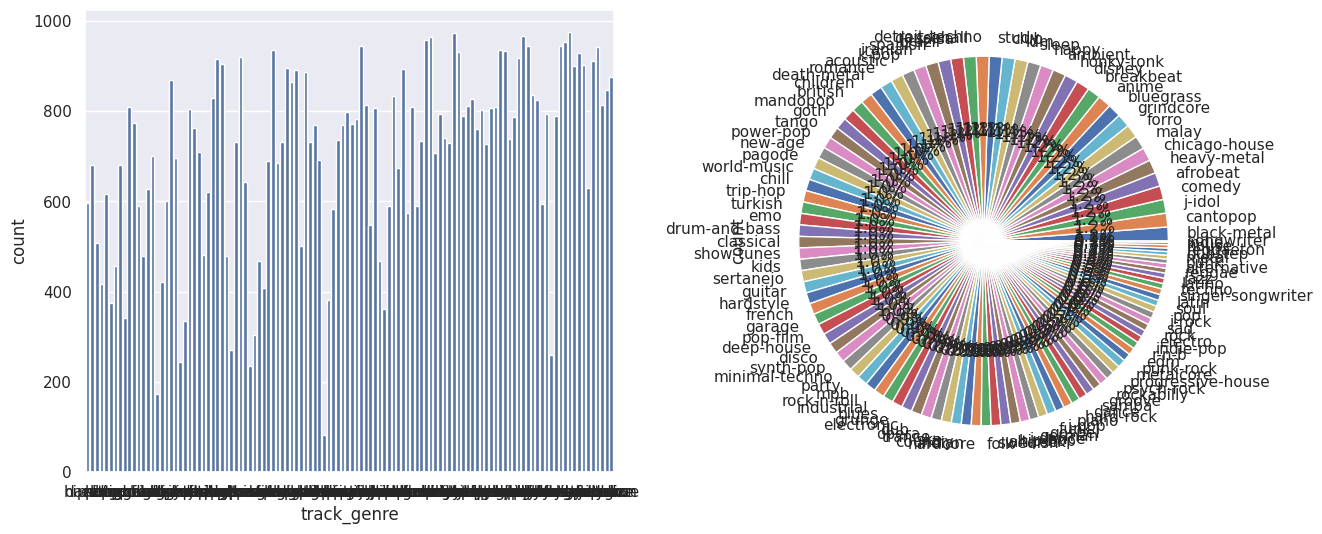

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='track_genre', data=df_cleaned, ax=ax[0])
_ = df_cleaned['track_genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

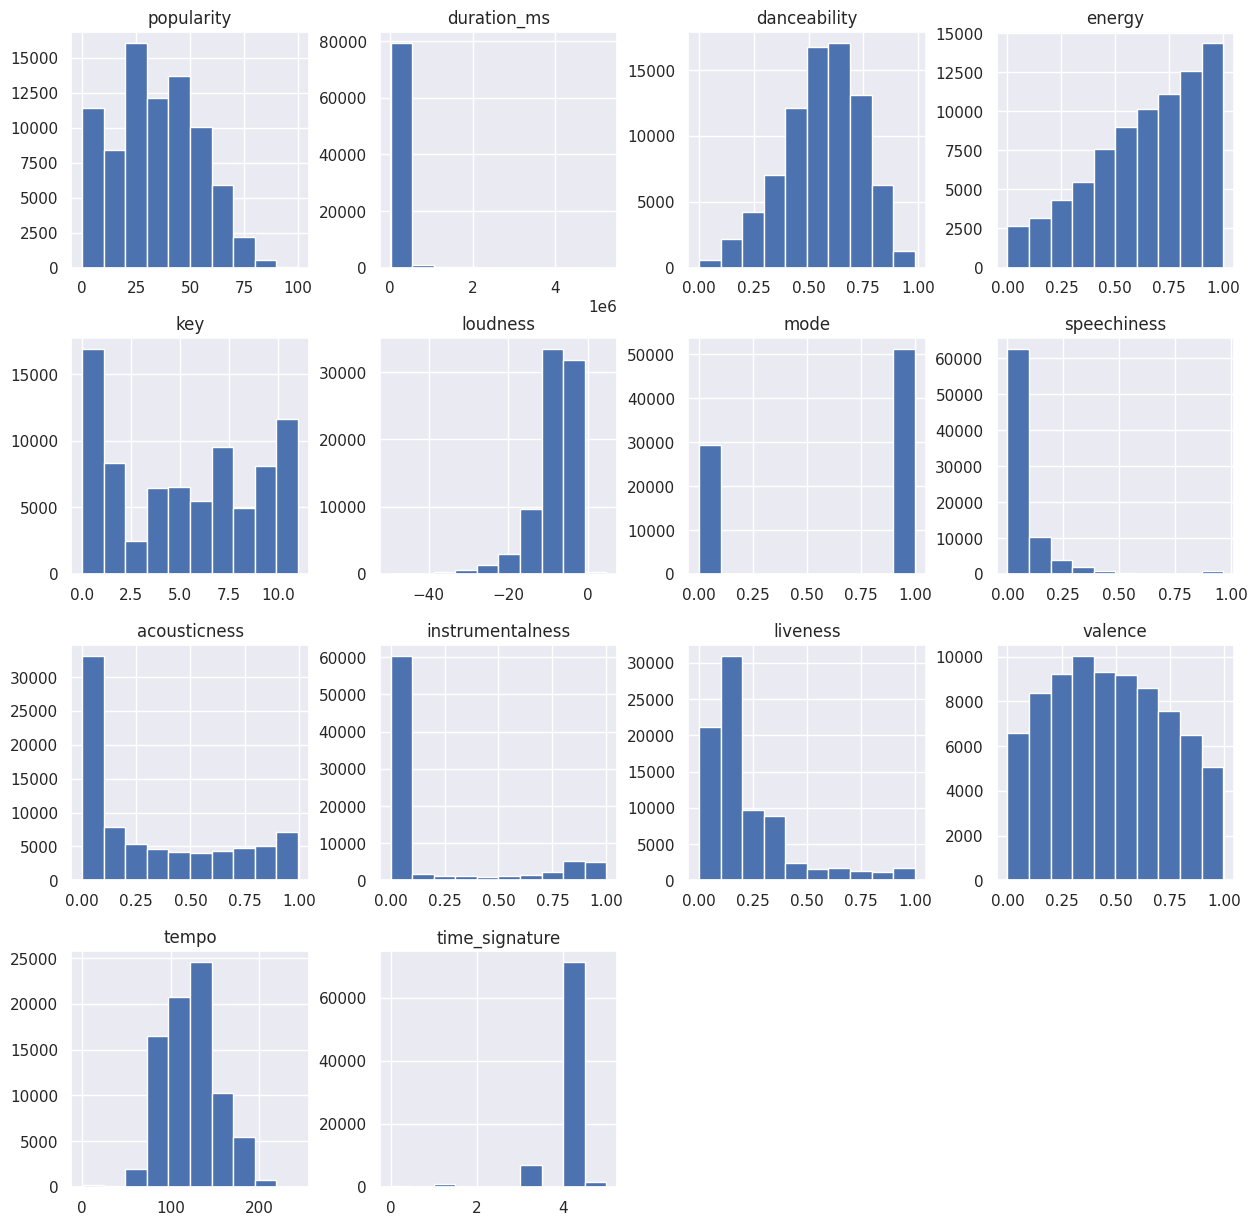

In [33]:
df_cleaned.hist(figsize=(15,15))
plt.show()

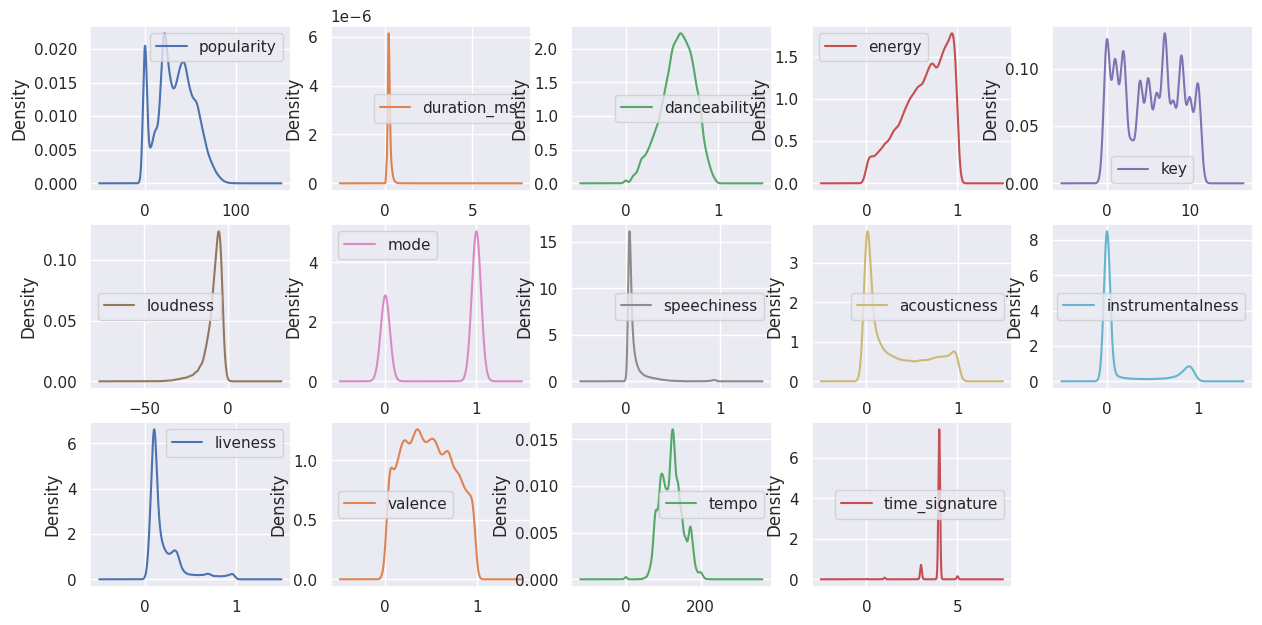

In [34]:
df_cleaned.plot(kind="density", layout=(6,5),
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

**Skewness**

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

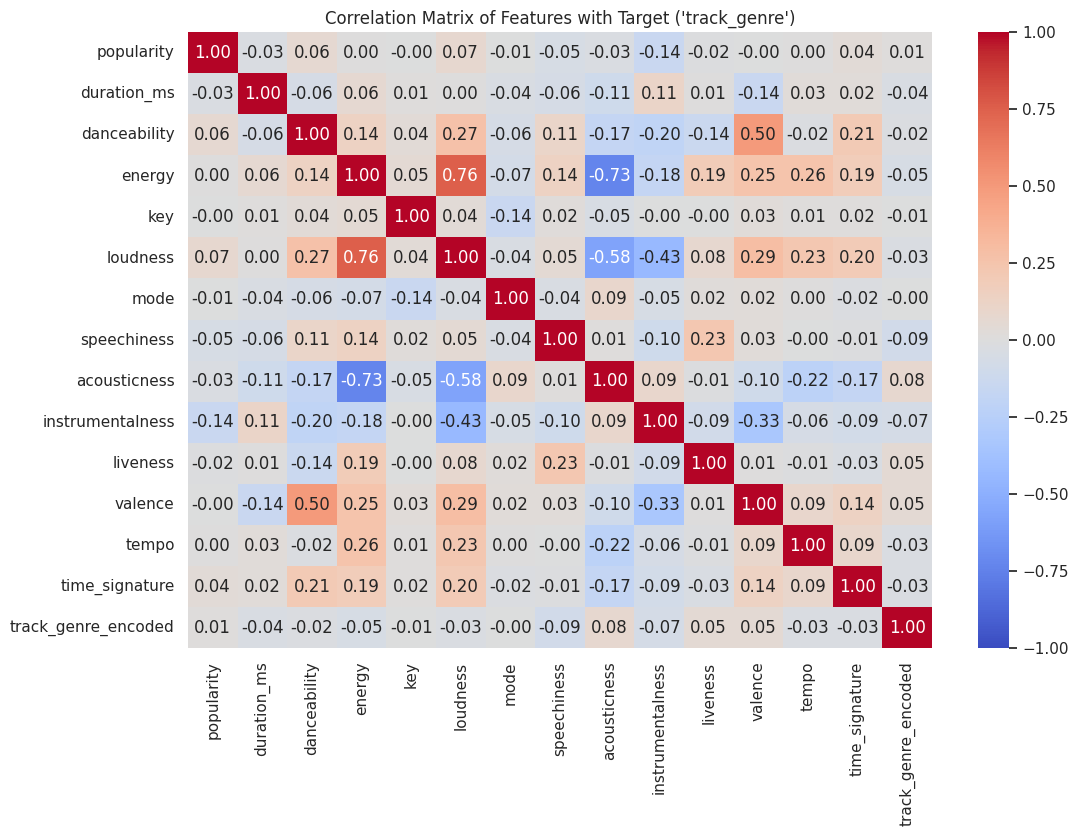

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is loaded in a DataFrame called df_cleaned
# Encode the target variable 'track_genre'
le = LabelEncoder()
df_cleaned['track_genre_encoded'] = le.fit_transform(df_cleaned['track_genre'])

# Define the list of numeric columns
numeric_columns = ['popularity', 'duration_ms', 'danceability', 'energy',
                   'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
                   'track_genre_encoded']

# Filter the columns that exist in the DataFrame
numeric_columns = [col for col in numeric_columns if col in df_cleaned.columns]

# Calculate the correlation matrix
corr_matrix = df_cleaned[numeric_columns].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Target ('track_genre')")
plt.show()



From the correlation matrix , we can see the relationships between the features and the target variable track_genre_encoded. Here's how to interpret the correlations:


Correlation values range between -1 and 1:

A value of 1 means a perfect positive correlation (as one variable increases, the other also increases).

A value of -1 means a perfect negative correlation (as one variable increases, the other decreases).

A value near 0 means there is little to no linear correlation between the two variables.

Correlation with track_genre_encoded:
popularity: 0.04

Weak positive correlation with the target variable.
duration_ms: -0.03

Weak negative correlation with the target variable.
danceability: -0.02

Very weak negative correlation with the target variable.
energy: -0.06

Weak negative correlation with the target variable.
key: -0.01

No significant correlation with the target variable.
loudness: -0.04

Weak negative correlation with the target variable.
mode: -0.00

No correlation with the target variable.
speechiness: -0.09

Weak negative correlation with the target variable.
acousticness: 0.09

Weak positive correlation with the target variable.
instrumentalness: -0.06

Weak negative correlation with the target variable.
liveness: 0.05

Weak positive correlation with the target variable.
valence: -0.03

Weak negative correlation with the target variable.
tempo: -0.03

Weak negative correlation with the target variable.
time_signature: -0.03

Weak negative correlation with the target variable.

Conclusion:

None of the features show a strong correlation (positive or negative) with the target variable track_genre_encoded. The correlations are quite weak, indicating that the features, in their current form, may not have a strong linear relationship with track_genre.

**This suggests that a more sophisticated model, perhaps one that captures non-linear relationships (such as decision trees or random forests), might be needed to predict track_genre based on these features.**

**Note**: it is fair to say that there is weak correlation, but the method used (label encoding) might not be the most appropriate for drawing strong conclusions, because it is made on a categorical variable. It gives some indication though.

# Classification Project

In [36]:
df_cleaned.describe(include='all')

track_name                track_id  \
count                               80405                   80405   
unique                              73559                   80405   
top     Rockin' Around The Christmas Tree  3nqQXoyQOWXiESFLlDF1hG   
freq                                   45                       1   
mean                                  NaN                     NaN   
std                                   NaN                     NaN   
min                                   NaN                     NaN   
25%                                   NaN                     NaN   
50%                                   NaN                     NaN   
75%                                   NaN                     NaN   
max                                   NaN                     NaN   

             artists                  album_name    popularity   duration_ms  \
count          80405                       80405  80405.000000  8.040500e+04   
unique         29217                       44204           NaN           NaN   
top     George Jones  The Complete Hank Williams           NaN           NaN   
freq             249                         105           NaN           NaN   
mean             NaN                         NaN     33.489858  2.301400e+05   
std              NaN                         NaN     20.189401  1.156371e+05   
min              NaN                         NaN      0.000000  8.586000e+03   
25%              NaN                         NaN     20.000000  1.732770e+05   
50%              NaN                         NaN     33.000000  2.142530e+05   
75%              NaN                         NaN     48.000000  2.658000e+05   
max              NaN                         NaN    100.000000  5.237295e+06   

       explicit  danceability        energy           key  ...          mode  \
count     80405  80405.000000  80405.000000  80405.000000  ...  80405.000000   
unique        2           NaN           NaN           NaN  ...           NaN   
top       False           NaN           NaN           NaN  ...           NaN   
freq      73378           NaN           NaN           NaN  ...           NaN   
mean        NaN      0.561828      0.637923      5.287955  ...      0.635931   
std         NaN      0.177430      0.256098      3.555843  ...      0.481171   
min         NaN      0.000000      0.000000      0.000000  ...      0.000000   
25%         NaN      0.449000      0.462000      2.000000  ...      0.000000   
50%         NaN      0.576000      0.680000      5.000000  ...      1.000000   
75%         NaN      0.693000      0.856000      8.000000  ...      1.000000   
max         NaN      0.985000      1.000000     11.000000  ...      1.000000   

         speechiness  acousticness  instrumentalness      liveness  \
count   80405.000000  80405.000000      80405.000000  80405.000000   
unique           NaN           NaN               NaN           NaN   
top              NaN           NaN               NaN           NaN   
freq             NaN           NaN               NaN           NaN   
mean        0.088979      0.327676          0.173719      0.220087   
std         0.115941      0.337821          0.324025      0.198069   
min         0.000000      0.000000          0.000000      0.000000   
25%         0.036100      0.016700          0.000000      0.098300   
50%         0.049300      0.188000          0.000058      0.134000   
75%         0.087600      0.623000          0.098500      0.284000   
max         0.965000      0.996000          1.000000      1.000000   

             valence         tempo  time_signature  track_genre  \
count   80405.000000  80405.000000    80405.000000        80405   
unique           NaN           NaN             NaN          114   
top              NaN           NaN             NaN  black-metal   
freq             NaN           NaN             NaN          976   
mean        0.472848    122.172514        3.896847          NaN   
std         0.263311     30.174024   

<Axes: xlabel='track_genre'>

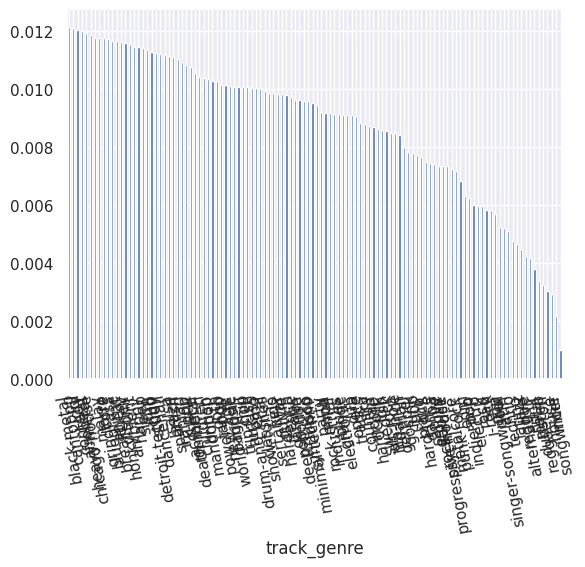

In [37]:
df_cleaned['track_genre'].value_counts(normalize = True ).plot.bar(100, rot=100)

This shows there is a great imbalance between all track genres.

In [38]:
df_cleaned.track_genre.value_counts().sort_values(ascending=False)[:10]

track_genre
black-metal      976
cantopop         973
j-idol           966
comedy           964
afrobeat         958
heavy-metal      953
chicago-house    946
malay            945
forro            944
grindcore        943
Name: count, dtype: int64

<Axes: xlabel='track_genre'>

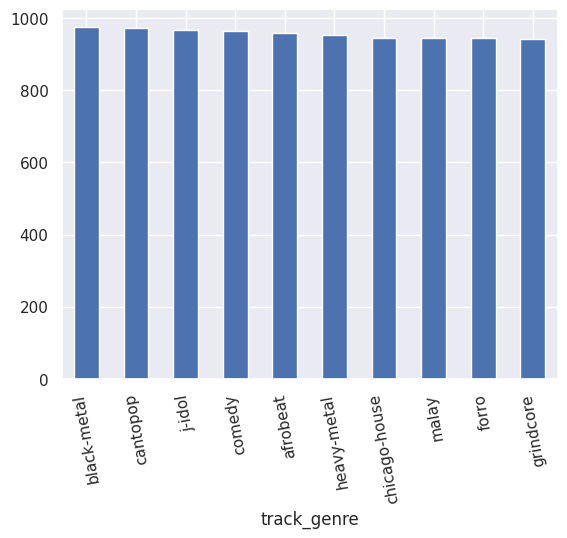

In [39]:
df_cleaned.track_genre.value_counts().sort_values(ascending=False)[:10].plot.bar(100, rot=100)

These 10 max track_genres are at the top and they are balanced !!
Lets try to find the important features now.

In [40]:
df_original.track_genre.nunique()

114

In [41]:
df_cleaned.track_genre.nunique()

114

no change in amount of track_genre before and after cleaning.

# Scaling the features

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Check the available columns in your DataFrame
print(df_cleaned.columns)

# Applying transformations based on skewness
# Use StandardScaler for features that need normalization based on their distribution
scaled_standard = standard_scaler.fit_transform(df_cleaned[['popularity', 'energy', 'danceability']])

# MinMax scaling for features like tempo, duration_ms that might span a wide range
scaled_min_max = min_max_scaler.fit_transform(df_cleaned[['tempo', 'duration_ms']])

# Ensure that these columns exist before applying PowerTransformer
if all(col in df_cleaned.columns for col in ['loudness', 'instrumentalness', 'speechiness', 'acousticness']):
    # Power transformation (Yeo-Johnson) to handle skewness in features
    scaled_power_transformed = yeo_johnson_transformer.fit_transform(df_cleaned[['loudness', 'instrumentalness', 'speechiness', 'acousticness']])
else:
    scaled_power_transformed = None
    print("One or more columns are missing for Yeo-Johnson transformation.")

# Combine back into a DataFrame (if needed)
if scaled_power_transformed is not None:
    scaled_df_cleaned = pd.DataFrame(np.hstack([scaled_standard, scaled_min_max, scaled_power_transformed]),
                                     columns=['popularity_scaled', 'energy_scaled', 'danceability_scaled',
                                              'tempo_scaled', 'duration_ms_scaled',
                                              'loudness_transformed', 'instrumentalness_transformed',
                                              'speechiness_transformed', 'acousticness_transformed'])
else:
    scaled_df_cleaned = pd.DataFrame(np.hstack([scaled_standard, scaled_min_max]),
                                     columns=['popularity_scaled', 'energy_scaled', 'danceability_scaled',
                                              'tempo_scaled', 'duration_ms_scaled'])

print(scaled_df_cleaned.head())


Index(['track_name', 'track_id', 'artists', 'album_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'track_genre_encoded'],
      dtype='object')
   popularity_scaled  energy_scaled  danceability_scaled  tempo_scaled  \
0           3.294330      -0.647890             0.857649      0.538768   
1           3.244799       0.562589             0.333495      0.526079   
2           3.195268       1.277163            -0.004668      0.526108   
3           3.195268       0.160398             1.539612      0.513535   
4           3.145737       0.289255             1.967952      0.378043   

   duration_ms_scaled  loudness_transformed  instrumentalness_transformed  \
0            0.028374              0.018965                     -0.620194   
1            0.036405              0.508418                

In [43]:
missing_columns = ['loudness', 'instrumentalness', 'speechiness', 'acousticness']
missing_in_data = [col for col in missing_columns if col not in df_cleaned.columns]
print("Missing columns:", missing_in_data)


Missing columns: []


Now we've got the top track_genre_encoded, in order to use them in the code later on.

dict(number encoded for the track_genre : value count)

Scaling Block: Used a combination of StandardScaler, MinMaxScaler, and Yeo-Johnson transformations to handle skewed and differently scaled features.

# Feature Engeneering

In [44]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features for loudness and tempo
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'tempo' feature
poly_features = poly.fit_transform(df_cleaned[['tempo']])

# Get the feature names for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['tempo'])

# Adding polynomial features to the DataFrame with appropriate names
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df_cleaned = pd.concat([df_cleaned, poly_df], axis=1)

# Check the result
print(df_cleaned.head())

                              track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx   

                      artists                             album_name  \
0        Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
1            Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
2     David Guetta;Bebe Rexha                        I'm Good (Blue)   
3               Manuel Turizo                             La Bachata   
4  Bad Bunny;Chencho Corleone                       Un Verano Sin Ti   

   popularity  duration_ms  explicit  danceability  energy  key  ...  \
0       100.0     156943.0     False         0.714   0.472  2.0  ...   
1        99.0 

In [45]:
# Interaction terms
# Create interactions between features that may affect the outcome together
df_cleaned['energy_danceability_interaction'] = df_cleaned['energy'] * df_cleaned['danceability']
df_cleaned['speechiness_acousticness_interaction'] = df_cleaned['speechiness'] * df_cleaned['acousticness']

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Drop the original tempo column if you don't want to keep it, or modify as needed
df_cleaned = pd.concat([df_cleaned, poly_df], axis=1)

# Log transformations to reduce skewness in highly skewed features
df_cleaned['log_duration_ms'] = np.log1p(df_cleaned['duration_ms'])  # log(1 + x) to handle zero values
df_cleaned['log_instrumentalness'] = np.log1p(df_cleaned['instrumentalness'])

# Binning the `valence` into categories (low, medium, high)
df_cleaned['valence_binned'] = pd.qcut(df_cleaned['valence'], q=3, labels=['low', 'medium', 'high'])

# Discretizing the `time_signature` since it's a categorical feature
df_cleaned['time_signature_binned'] = pd.cut(df_cleaned['time_signature'], bins=[0, 3, 4, 5], labels=['3/4', '4/4', '5/4'])

# Save the cleaned dataset
df_cleaned.to_csv('clean_engeneered_dataset.csv', index=False)

# Check the updated DataFrame
print(df_cleaned.head())

                              track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx   

                      artists                             album_name  \
0        Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
1            Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
2     David Guetta;Bebe Rexha                        I'm Good (Blue)   
3               Manuel Turizo                             La Bachata   
4  Bad Bunny;Chencho Corleone                       Un Verano Sin Ti   

   popularity  duration_ms  explicit  danceability  energy  key  ...  \
0       100.0     156943.0     False         0.714   0.472  2.0  ...   
1        99.0 

Feature Engineering Block: Included interaction terms, polynomial features, log transformations, binning, and discretization to enhance the predictive power of the features.

 performing feature engineering by creating interaction terms, polynomial features, log transformations, and binning:

1. Interaction Terms:
creating interaction features, which capture the combined effect of two variables that might affect the outcome together.

energy_danceability_interaction: This feature multiplies energy and danceability, which may reveal how tracks with both high energy and danceability relate to the target (track_genre).
speechiness_acousticness_interaction: This multiplies speechiness and acousticness, potentially capturing how the combination of spoken word and acoustic sounds correlates with different genres.
2. Polynomial Features:
By generating polynomial features for loudness and tempo with PolynomialFeatures(degree=2), it's introducing non-linear relationships between these variables and the target.

Polynomial features include the original feature (tempo), squared terms (tempo^2), and cross-products (if there were more than one feature).
These can help the model detect complex relationships that linear features might miss.
3. Log Transformations:
 applying log transformations to reduce skewness in highly skewed features.

log_duration_ms: Applying a log transformation to duration_ms helps make highly skewed distributions more normal (Gaussian), which often improves the performance of many machine learning models.
log_instrumentalness: Similarly, taking the log of instrumentalness reduces the impact of large outliers.
Using np.log1p() is a good practice because it ensures that zero values (common in datasets) don’t cause mathematical errors (logarithms of zero are undefined).

4. Binning:
valence_binned:  binning valence into 3 categories (low, medium, high) using pd.qcut(). This method of binning divides the data into quantiles, ensuring that each bin contains an equal number of data points.
Example: Tracks with valence values in the lower third of the distribution are labeled as "low," and so on. This is helpful when you want to treat a continuous feature as categorical.
time_signature_binned: You discretize time_signature into meaningful categories, treating it as a categorical feature with values like '3/4', '4/4', and '5/4'. This is useful when the time_signature is better understood as categories rather than a numeric variable.

# Model training

## Import Libraries

In [4]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel


## Data used for training (after cleaning and engeneering)

**Activate the direct tempered file, instead of activating the whole cleanup and engeneering process. This file (clean_engeneered_dataset.csv) is the last file created after the EDA +extra cleanup+ scaling features + engeneered features.**

This is just to save time for you, but you can run the whole beggining of this notebook if you have extra time :)

In [5]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=14WjfRcf8_pcNtnokNx9b611uDHKiTQYm'

    return path


In [7]:
import pandas as pd  # Import pandas library

# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/14WjfRcf8_pcNtnokNx9b611uDHKiTQYm/view?usp=drive_link'

# Generate the direct download link
clean_engeneered_dataset = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df_cleaned_engeneered = pd.read_csv(clean_engeneered_dataset)

# Display the first few rows to confirm it's loaded correctly
df_cleaned_engeneered.head()


track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx   

                      artists                             album_name  \
0        Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
1            Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
2     David Guetta;Bebe Rexha                        I'm Good (Blue)   
3               Manuel Turizo                             La Bachata   
4  Bad Bunny;Chencho Corleone                       Un Verano Sin Ti   

   popularity  duration_ms  explicit  danceability  energy  key  ...  \
0       100.0     156943.0     False         0.714   0.472  2.0  ...   
1        99.0     198937.0     False         0.621   0.782  2.0  ...   
2        98.0     175238.0      True         0.561   0.965  7.0  ...   
3        98.0     162637.0     False         0.835   0.679  7.0  ...   
4        97.0     178567.0      True         0.911   0.712  1.0  ...   

        tempo^2  energy_danceability_interaction  \
0  17192.716641                         0.337008   
1  16392.449089                         0.485622   
2  16394.241600                         0.541365   
3  15620.000400                         0.566965   
4   8464.920025                         0.648632   

   speechiness_acousticness_interaction  1.1  tempo.2     tempo^2.1  \
0                              0.001123  1.0  131.121  17192.716641   
1                              0.000550  1.0  128.033  16392.449089   
2                              0.000131  1.0  128.040  16394.241600   
3                              0.021221  1.0  124.980  15620.000400   
4                              0.007361  1.0   92.005   8464.920025   

   log_duration_ms  log_instrumentalness  valence_binned time_signature_binned  
0        11.963644              0.000005             low                   4/4  
1        12.200748              0.032467          medium                   4/4  
2        12.073906              0.000007             low                   4/4  
3        11.999282              0.000002            high                   4/4  
4        12.092725              0.000027          medium                   4/4  

[5 rows x 33 columns]

## Prepare Data for Model Training

**No nead to run this block** , this is served only as an example for what is going to be implemented in the MLops code with mutliple model training plus comparison.
So in fact, in each code block we split and train all over again to see the differences in how the models behave with different genres and different features.
Untill it is coming to a conclusion at the final block code after pca&k-mean method (at the end of this notebook).

Also make sure that this model training is using clean_engeneered_dataset.csv that already handled cleaning of the data and adding engeneered features.

In [49]:
# Defining X (features) and y (target)
X = df_cleaned.drop(columns=['track_genre_encoded'])  # Drop the target column
y = df_cleaned['track_genre_encoded']  # Target column

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Decision Tree Model - before SMOTE (before balancing the classes/genres). Got 0.288 test accuracy (poor performance on raw classes and raw features).

This model is training on all 114 classes before balancing them and also to check feature importance.


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Train Accuracy: 0.5541
Test Accuracy: 0.2883
F1 Score (Test): 0.2871


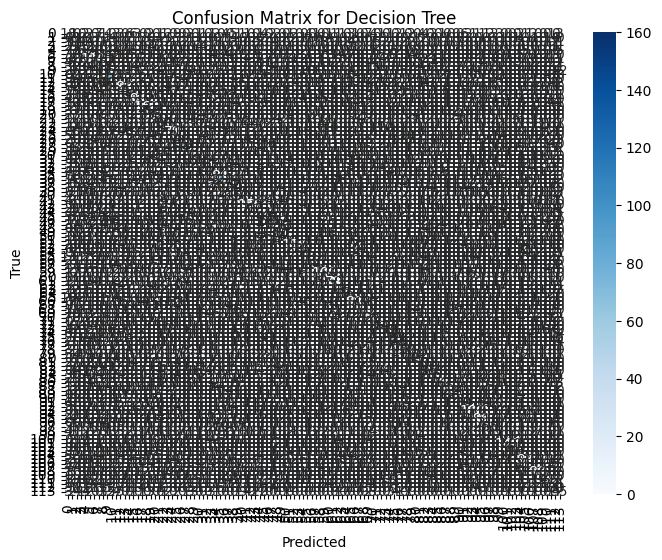

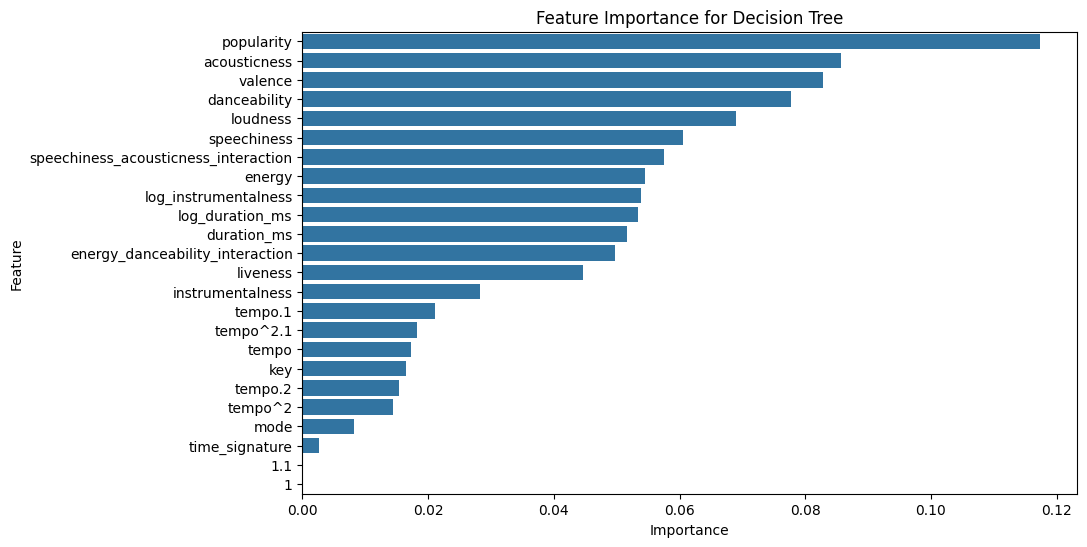


Model Comparison Summary:
      model_name  train_accuracy  test_accuracy  f1_score  \
0  Decision Tree        0.554054       0.288291  0.287115   

                                         best_params  
0  {'classifier__max_depth': 20, 'classifier__min...  


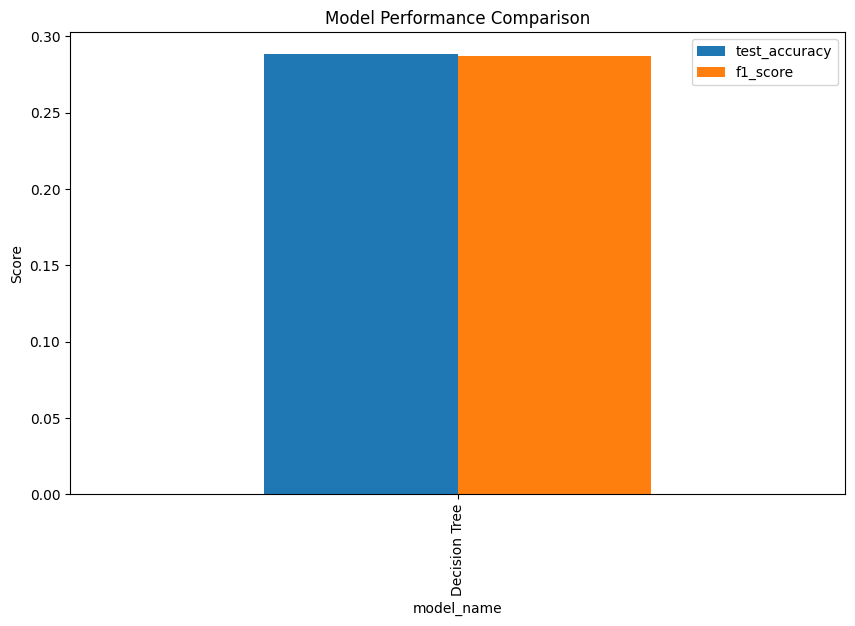

In [8]:
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define path to your results CSV file
results_path = 'model_results.csv'

# Load existing results if file exists, otherwise create an empty DataFrame
if os.path.exists(results_path):
    summary_df = pd.read_csv(results_path)
else:
    summary_df = pd.DataFrame(columns=['model_name', 'train_accuracy', 'test_accuracy', 'f1_score', 'best_params'])  # Define columns to be saved

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define target and features
    target_column = 'track_genre_encoded'  # Replace with your actual target column name
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Define numeric features
    numeric_features = list(set(X.select_dtypes(include=['int64', 'float64']).columns.tolist()))

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

    # Define models and hyperparameter grids to evaluate
    models = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_samples_leaf': [1, 2, 4]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_info['model'])])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'model_name': model_name,  # Add model name to the dictionary
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'f1_score': f1_test,
            'best_params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature Importance Visualization for Tree-Based Models
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            feature_importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numeric_features  # Only using numeric features
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {model_name}')
            plt.show()

    # Convert the summary to DataFrame
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('model_name', inplace=True)
    summary_df[['test_accuracy', 'f1_score']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Save the results to the CSV file
    if os.path.exists(results_path):
        # Append to the existing CSV file
        summary_df.to_csv(results_path, mode='a', header=True, index=False)
    else:
        # Create a new CSV file
        summary_df.to_csv(results_path, index=False)

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training a Decision Tree Model - after SMOTE (after balancing the classes/genres). Got 0.27 test accuracy (SMOTE doesn't necesseraly help because of poor diffrentiation between entire 114 classes)


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': None}
Train Accuracy: 0.9990
Test Accuracy: 0.2706
F1 Score (Test): 0.2716


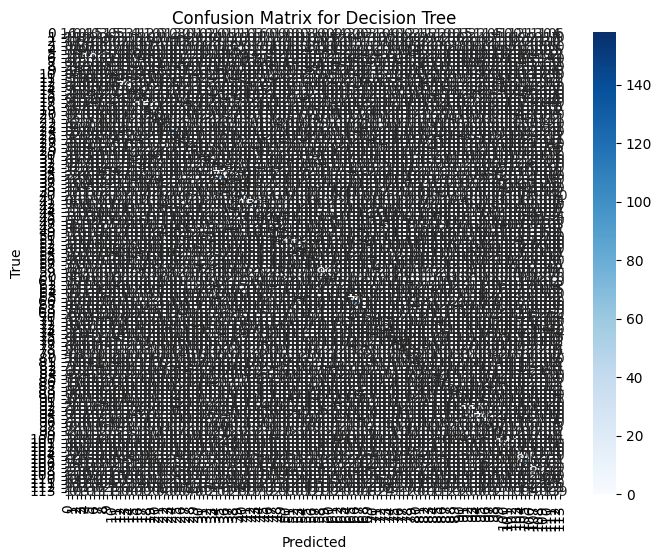

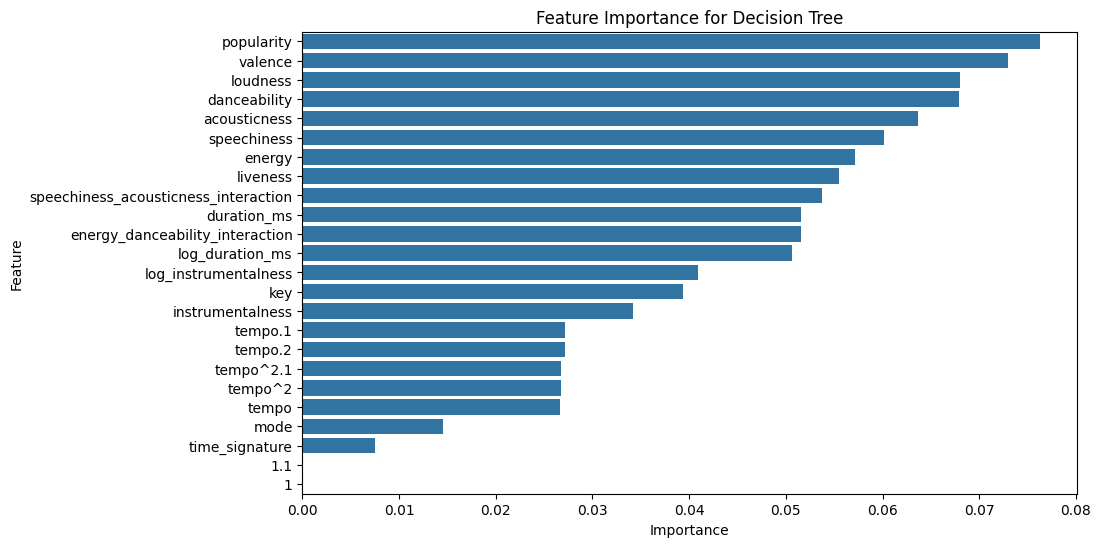


Model Comparison Summary:
           Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0  Decision Tree        0.999036       0.270568         0.271606   

                       Best Params  
0  {'classifier__max_depth': None}  


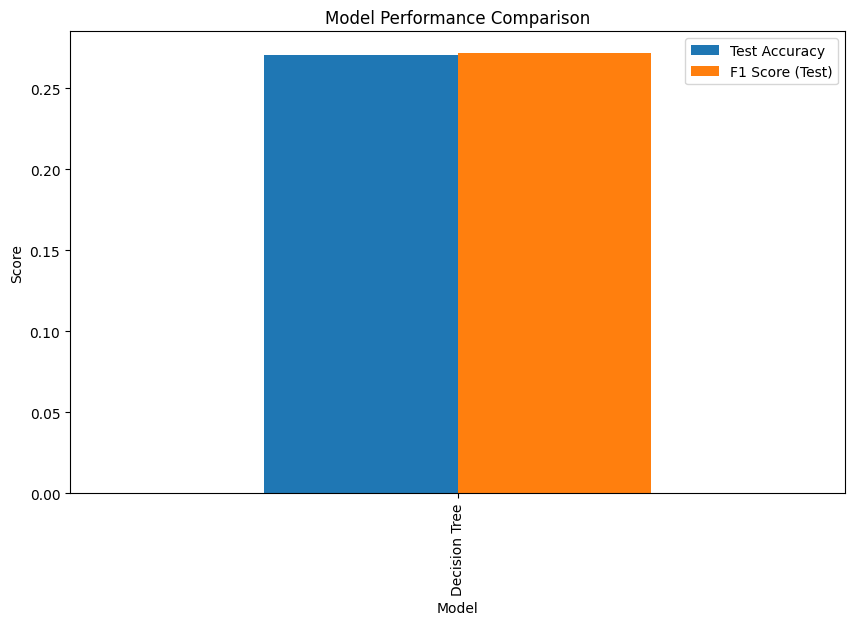

In [9]:
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline as sk_pipeline
from imblearn.pipeline import Pipeline as im_pipeline  # Import imbalanced-learn's Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np

# Define path to your results CSV file
results_path = 'model_results.csv'

# Load existing results if file exists, otherwise create an empty DataFrame
if os.path.exists(results_path):
    summary_df = pd.read_csv(results_path)
else:
    summary_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score (Test)', 'Best Params'])

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define target and features
    target_column = 'track_genre_encoded'  # Replace with your actual target column name
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Define numeric features
    numeric_features = list(set(X.select_dtypes(include=['int64', 'float64']).columns.tolist()))

    # Define the preprocessing for numeric features
    numeric_transformer = sk_pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing, SMOTE, and model (using imbalanced-learn's pipeline)
        pipeline = im_pipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature Importance Visualization for Tree-Based Models
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            feature_importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numeric_features  # Only using numeric features
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {model_name}')
            plt.show()

    # Convert the summary to DataFrame
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Save the results to the CSV file
    if os.path.exists(results_path):
        summary_df.to_csv(results_path, mode='a', header=False, index=False)  # Append without header
    else:
        summary_df.to_csv(results_path, index=False)

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training Desicion Tree Model after SMOTE + using the 4 top important features (popularity, danceability, valence, speechiness). Got 0.176 test accuracy (low performance due to use of only raw features)


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.1937
Test Accuracy: 0.1760
F1 Score (Test): 0.1527


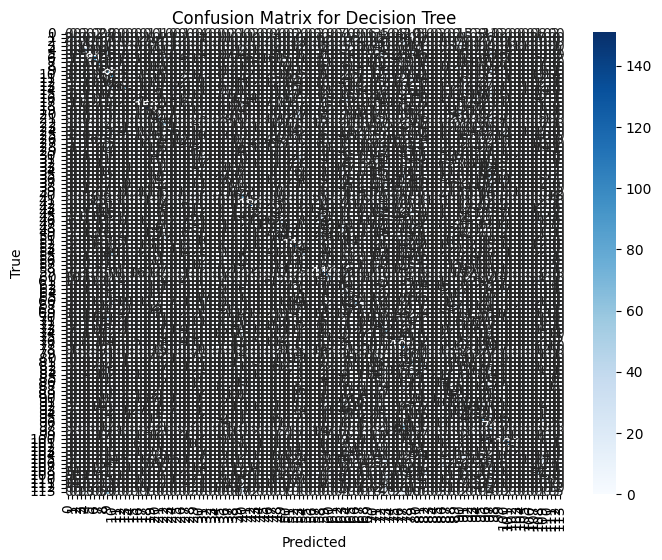

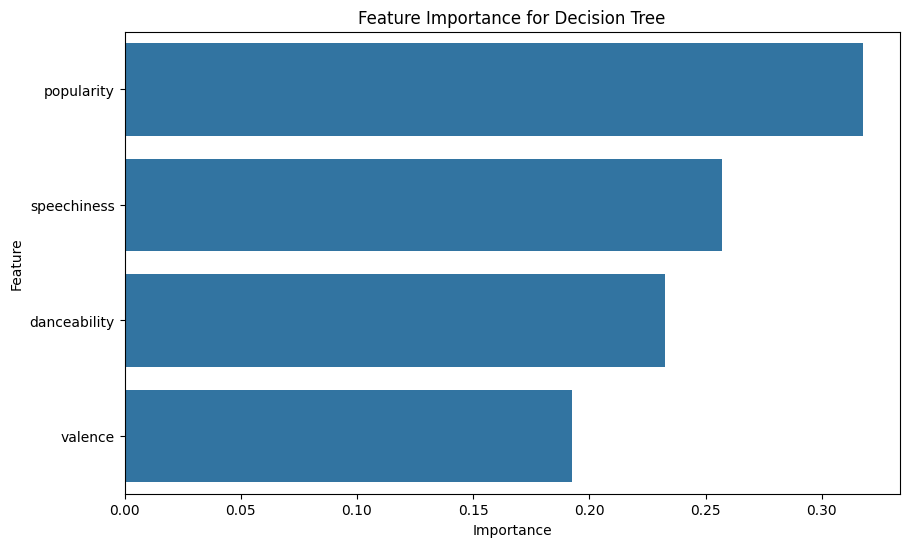


Model Comparison Summary:
           Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0  Decision Tree         0.19366       0.176046         0.152655   

                     Best Params  
0  {'classifier__max_depth': 10}  


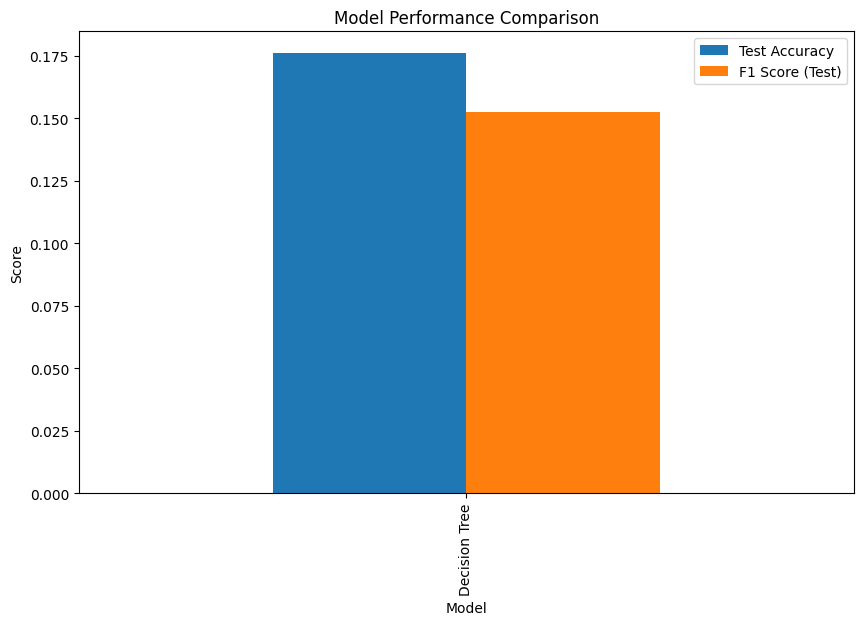

In [10]:
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline as sk_pipeline
from imblearn.pipeline import Pipeline as im_pipeline  # Import imbalanced-learn's Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np

# Define path to your results CSV file
results_path = 'model_results.csv'

# Load existing results if file exists, otherwise create an empty DataFrame
if os.path.exists(results_path):
    summary_df = pd.read_csv(results_path)
else:
    summary_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score (Test)', 'Best Params'])

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define target and features
    top_features = ['popularity', 'danceability', 'valence', 'speechiness'] # top 3 features
    target_column = 'track_genre_encoded'  # Replace with your actual target column name
    X = df[top_features]
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Define numeric features
    numeric_features = list(set(X.select_dtypes(include=['int64', 'float64']).columns.tolist()))

    # Define the preprocessing for numeric features
    numeric_transformer = sk_pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing, SMOTE, and model (using imbalanced-learn's pipeline)
        pipeline = im_pipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature Importance Visualization for Tree-Based Models
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            feature_importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numeric_features  # Only using numeric features
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {model_name}')
            plt.show()

    # Convert the summary to DataFrame
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Save the results to the CSV file
    if os.path.exists(results_path):
        summary_df.to_csv(results_path, mode='a', header=False, index=False)  # Append without header
    else:
        summary_df.to_csv(results_path, index=False)

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training Desicion Tree Model based only 4 balanced classes now (including SMOTE also)  and the top raw features. Got 0.85 test accuracy !!


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9413
Test Accuracy: 0.8504
F1 Score (Test): 0.8510


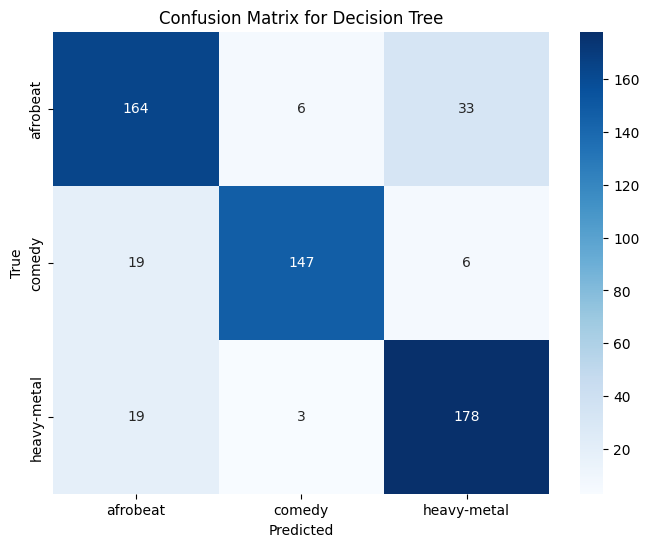

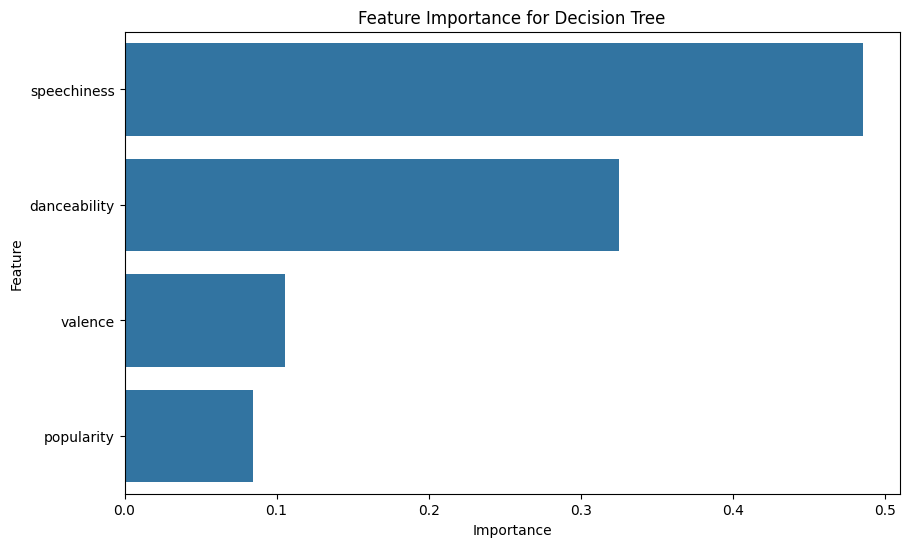


Model Comparison Summary:
           Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0  Decision Tree        0.941304       0.850435          0.85099   

                     Best Params  
0  {'classifier__max_depth': 10}  


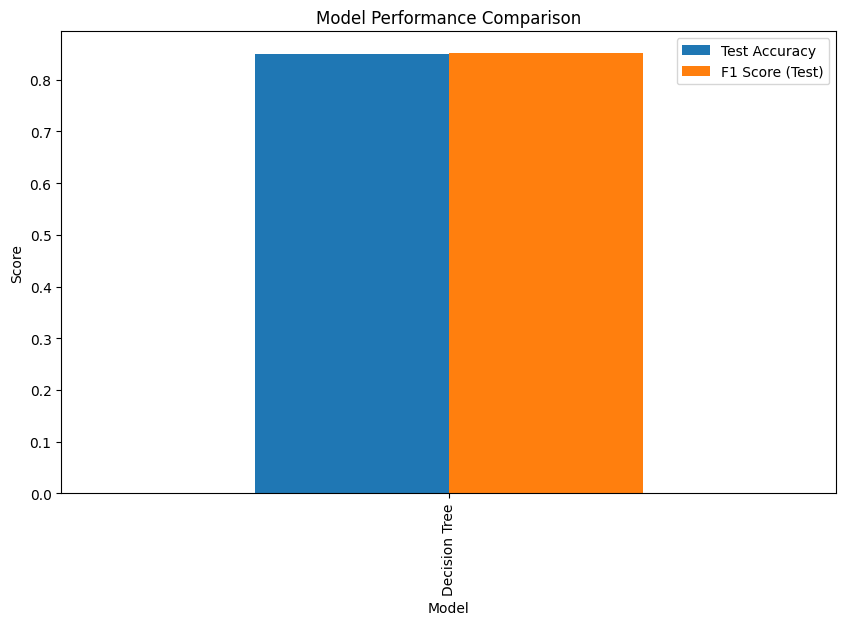

In [11]:
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline as sk_pipeline
from imblearn.pipeline import Pipeline as im_pipeline  # Import imbalanced-learn's Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np

# Define path to your results CSV file
results_path = 'model_results.csv'

# Load existing results if file exists, otherwise create an empty DataFrame
if os.path.exists(results_path):
    summary_df = pd.read_csv(results_path)
else:
    summary_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score (Test)', 'Best Params'])

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define track genres to keep
    genres_to_keep = ['j-dol','comedy','afrobeat','heavy-metal'] # these are 4 of the top balanced genres

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['popularity', 'danceability', 'valence', 'speechiness', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = list(set(X.select_dtypes(include=['int64', 'float64']).columns.tolist()))

    # Define the preprocessing for numeric features
    numeric_transformer = sk_pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing, SMOTE, and model (using imbalanced-learn's pipeline)
        pipeline = im_pipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature Importance Visualization for Tree-Based Models
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            feature_importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = numeric_features  # Only using numeric features
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance for {model_name}')
            plt.show()

    # Convert the summary to DataFrame
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Save the results to the CSV file
    if os.path.exists(results_path):
        summary_df.to_csv(results_path, mode='a', header=False, index=False)  # Append without header
    else:
        summary_df.to_csv(results_path, index=False)

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) - Before feature engeneering (only 4 raw classes + 4 top raw features) - This training is made on 4 classes that are some of the 10 top balanced genres checked earlier in this notebook. (So no need to SMOTE here) + 4 top important raw features. Got 0.88 test accuracy for Random Forest and SVM.

First few rows of the dataset:
                              track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx   

                      artists                             album_name  \
0        Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
1            Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
2     David Guetta;Bebe Rexha                        I'm Good (Blue)   
3               Manuel Turizo                             La Bachata   
4  Bad Bunny;Chencho Corleone                       Un Verano Sin Ti   

   popularity  duration_ms  explicit  danceability  energy  key  ...  \
0       100.0     156943.0     False         0.714   0.

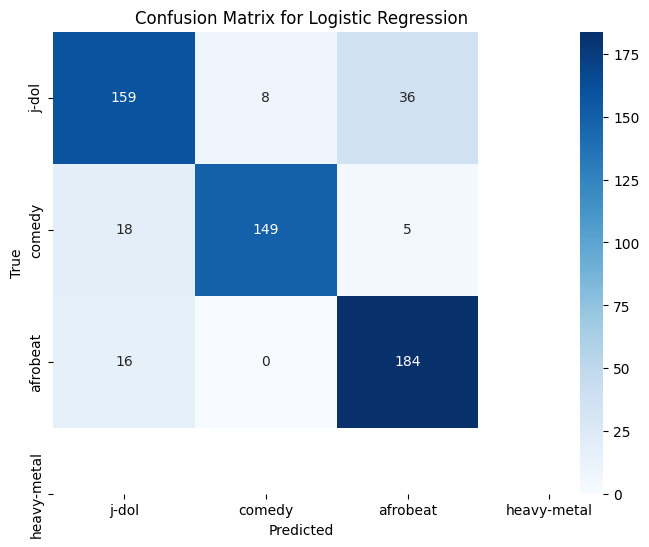


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Train Accuracy: 0.9987
Test Accuracy: 0.8835
F1 Score (Test): 0.8840


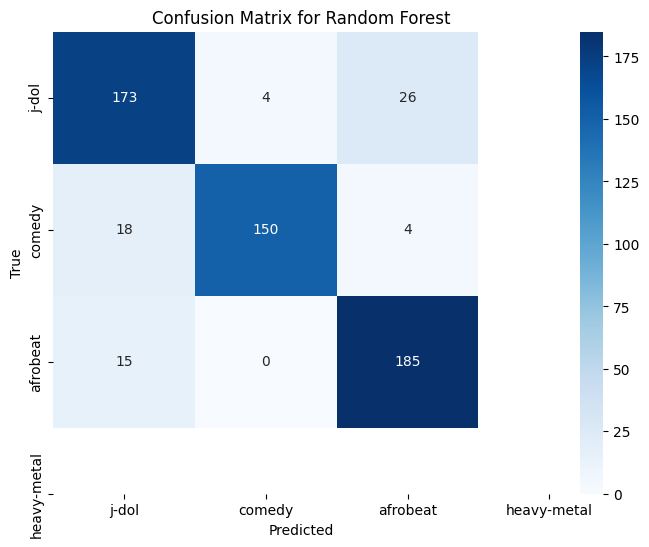


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.8965
Test Accuracy: 0.8800
F1 Score (Test): 0.8802


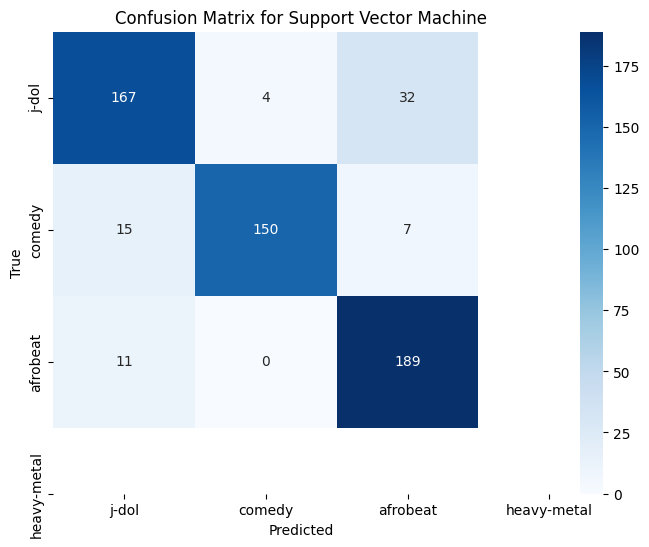


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9413
Test Accuracy: 0.8557
F1 Score (Test): 0.8554


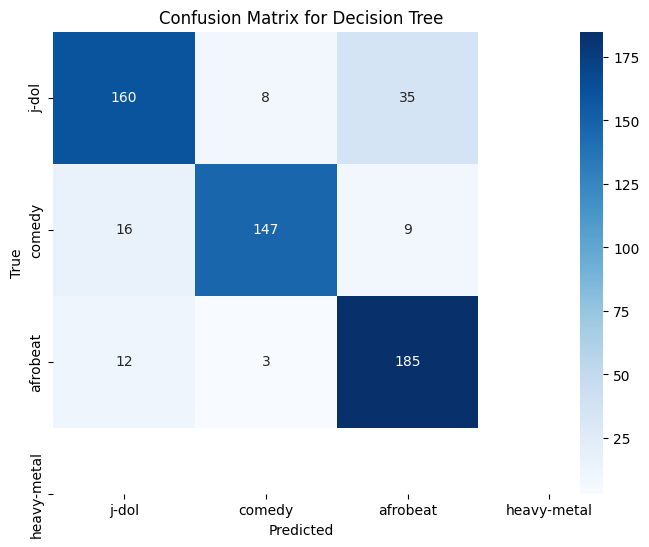


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.861739       0.855652         0.855626   
1           Random Forest        0.998696       0.883478         0.884046   
2  Support Vector Machine        0.896522       0.880000         0.880235   
3           Decision Tree        0.941304       0.855652         0.855424   

                                         Best Params  
0                               {'classifier__C': 1}  
1  {'classifier__max_depth': 20, 'classifier__n_e...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 10}  


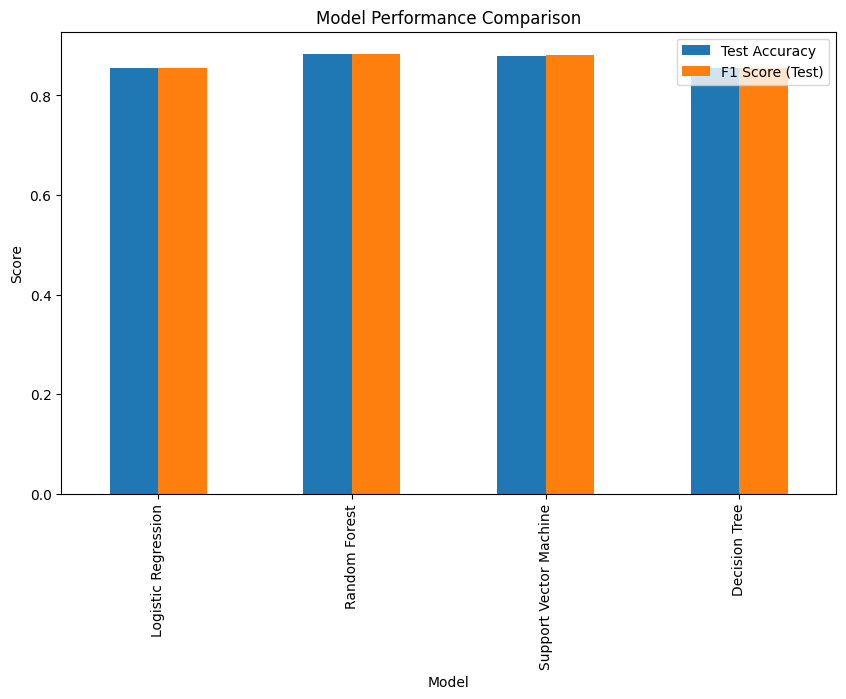

In [13]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os  # For checking file existence

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Define path to your results CSV file
results_path = 'model_results2.csv'

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Define track genres to keep
    genres_to_keep = ['j-dol', 'comedy', 'afrobeat', 'heavy-metal']  # these are 4 of the top balanced genres

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['popularity', 'danceability', 'valence', 'speechiness', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Convert the summary to DataFrame
    summary_df = pd.DataFrame(summary)

    # Display the summary
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save results to CSV
    if os.path.exists(results_path):
        summary_df.to_csv(results_path, mode='a', header=False, index=False)  # Append without header if file exists
    else:
        summary_df.to_csv(results_path, index=False)  # Create file with header if it doesn't exist

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) - After feature engeneering (on 4 raw balanced classes like before + engeneered features). Got best result for Random forest 0.88 test accuracy.


Evaluating model: Logistic Regression
Best Hyperparameters: {'classifier__C': 100}
Train Accuracy: 0.8683
Test Accuracy: 0.8626
F1 Score (Test): 0.8623


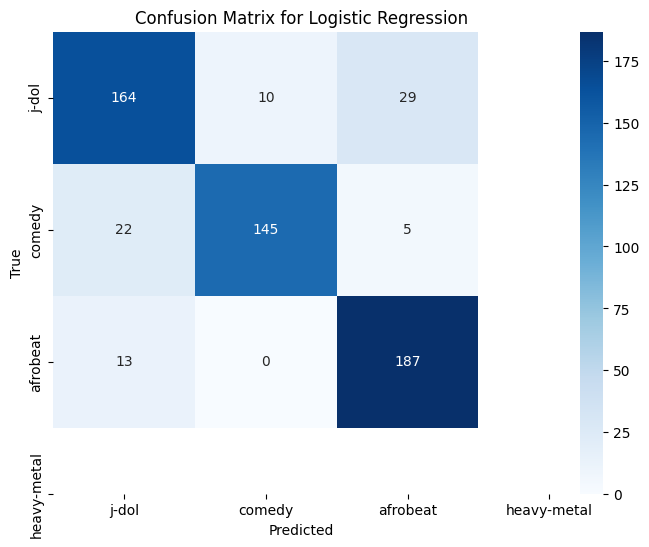

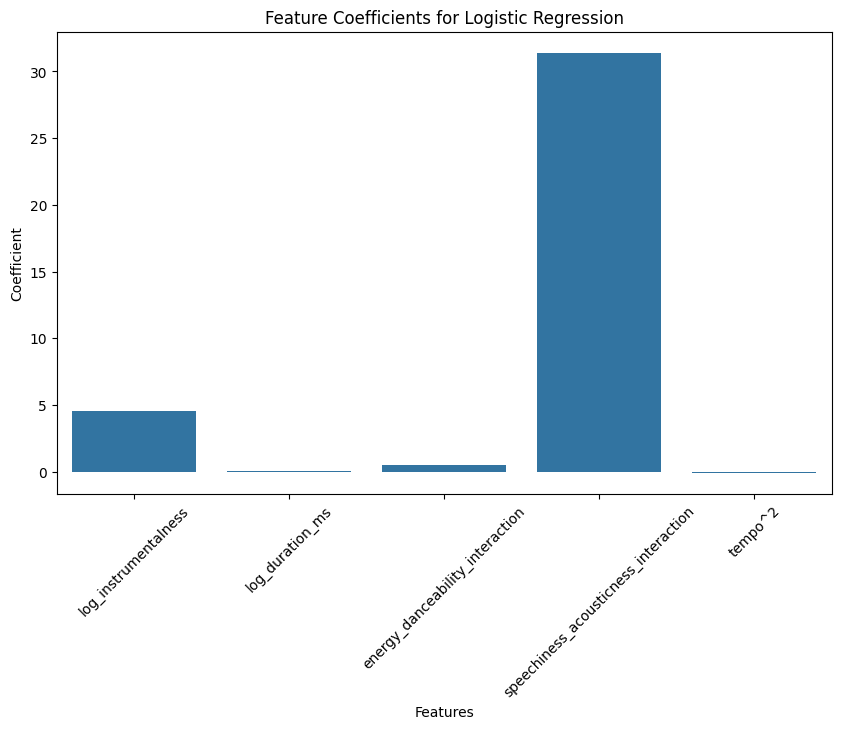


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Train Accuracy: 0.9996
Test Accuracy: 0.8835
F1 Score (Test): 0.8830


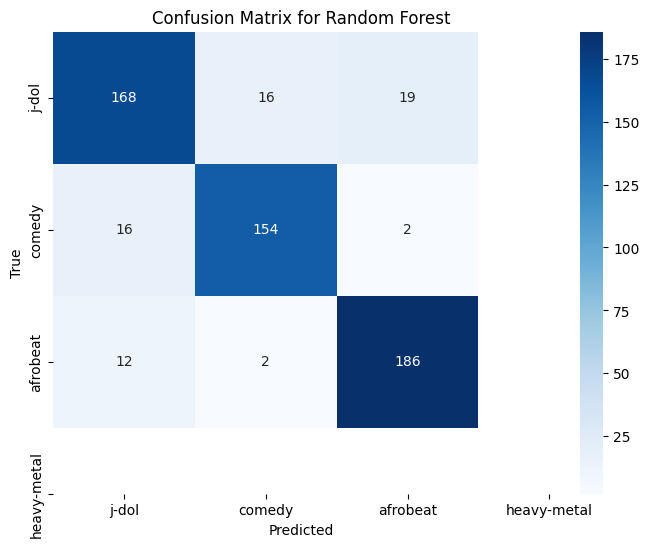

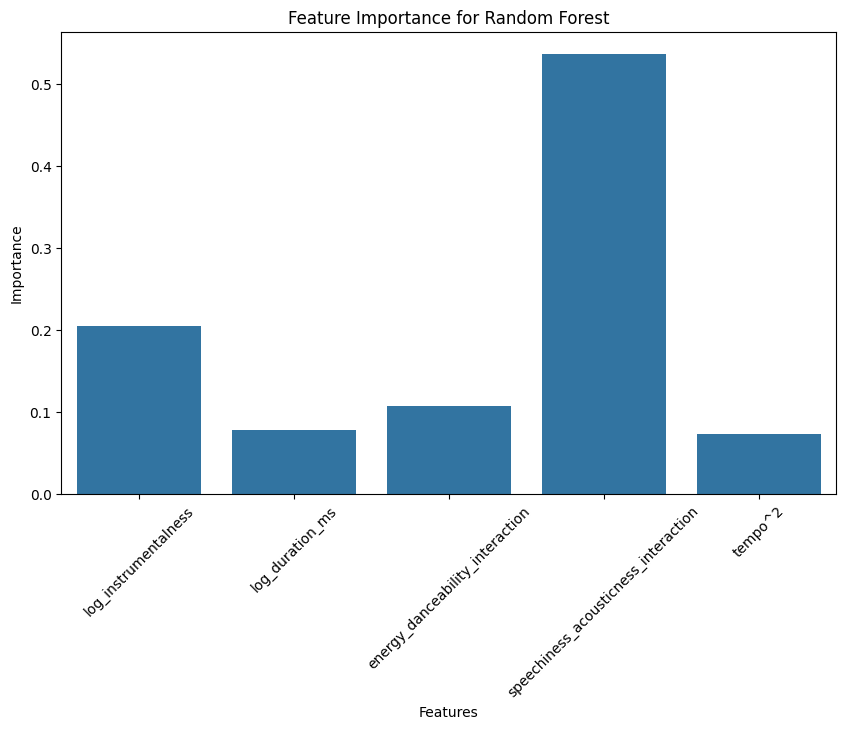


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Train Accuracy: 0.8509
Test Accuracy: 0.8522
F1 Score (Test): 0.8529


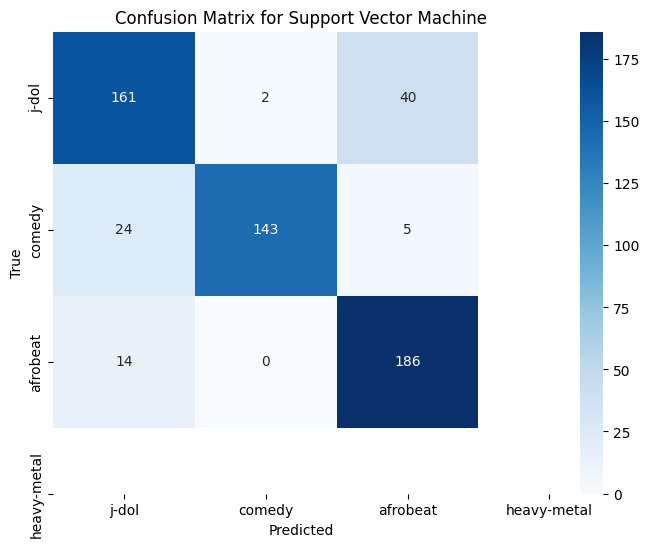

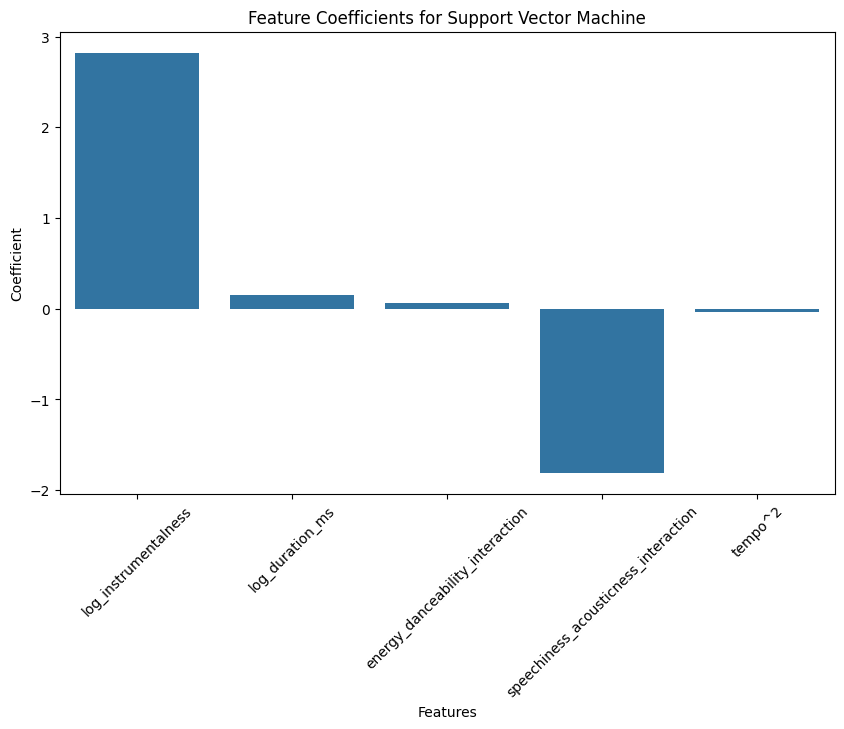


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9687
Test Accuracy: 0.8626
F1 Score (Test): 0.8616


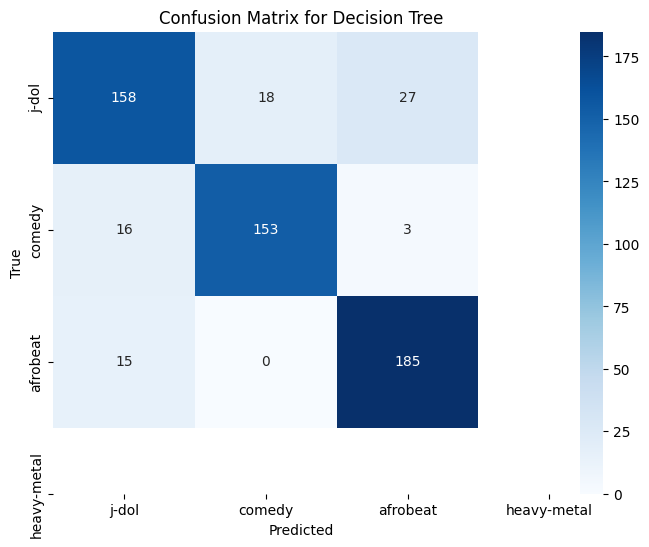

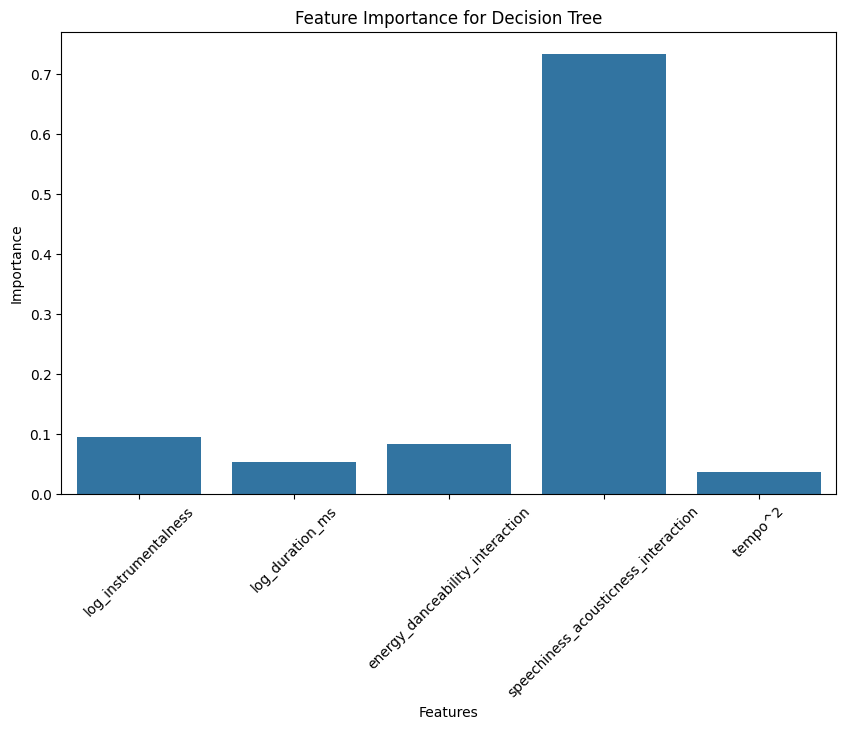


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.868261       0.862609         0.862334   
1           Random Forest        0.999565       0.883478         0.883041   
2  Support Vector Machine        0.850870       0.852174         0.852876   
3           Decision Tree        0.968696       0.862609         0.861569   

                                         Best Params  
0                             {'classifier__C': 100}  
1  {'classifier__max_depth': 20, 'classifier__n_e...  
2  {'classifier__C': 10, 'classifier__kernel': 'l...  
3                      {'classifier__max_depth': 10}  

Results saved to model_results3.csv


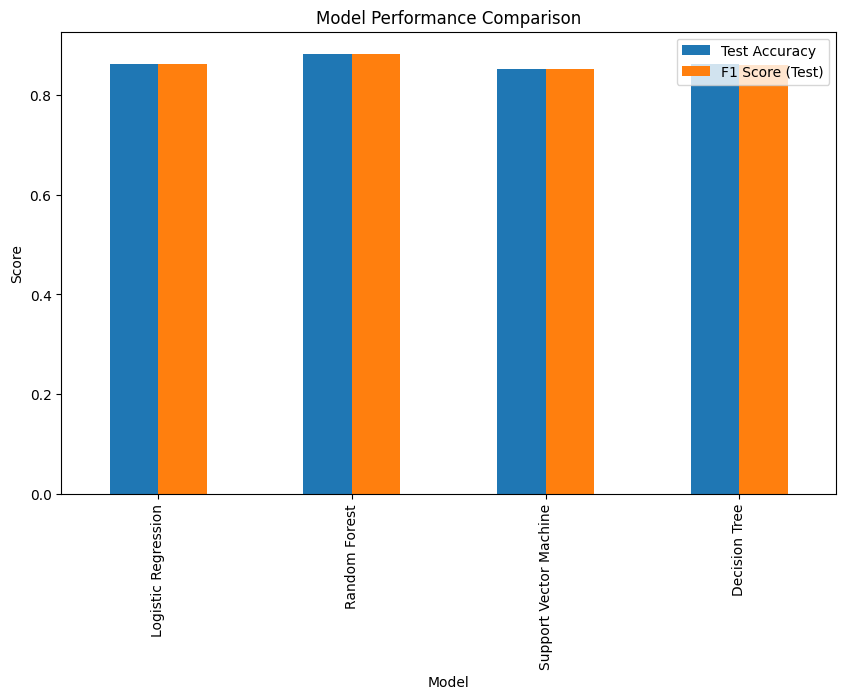

In [20]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define track genres to keep
    genres_to_keep = ['j-dol', 'comedy', 'afrobeat', 'heavy-metal']  # these are 4 of the top balanced genres

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['valence_binned', 'log_instrumentalness', 'log_duration_ms', 'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature importance visualization
        if model_name == "Random Forest" or model_name == "Decision Tree":
            importance = best_model.named_steps['classifier'].feature_importances_
            plt.figure(figsize=(10, 6))
            sns.barplot(x=numeric_features, y=importance)
            plt.title(f'Feature Importance for {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.xticks(rotation=45)
            plt.show()

        elif model_name == "Logistic Regression" or (model_name == "Support Vector Machine" and grid_search.best_params_['classifier__kernel'] == 'linear'):
            importance = best_model.named_steps['classifier'].coef_[0]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=numeric_features, y=importance)
            plt.title(f'Feature Coefficients for {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Coefficient')
            plt.xticks(rotation=45)
            plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save the summary to a CSV file
    summary_df.to_csv('model_results3.csv', index=False)
    print("\nResults saved to model_results3.csv")

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) - After selecting the 2 top engeneered features (on 4 raw balanced classes like before) -This training is made on 4 raw balanced classes like before + top 2 engeneered features. Got best result for Random forest & Decision Tree 0.84 test accuracy.


Evaluating model: Logistic Regression
Best Hyperparameters: {'classifier__C': 100}
Train Accuracy: 0.8152
Test Accuracy: 0.8226
F1 Score (Test): 0.8207


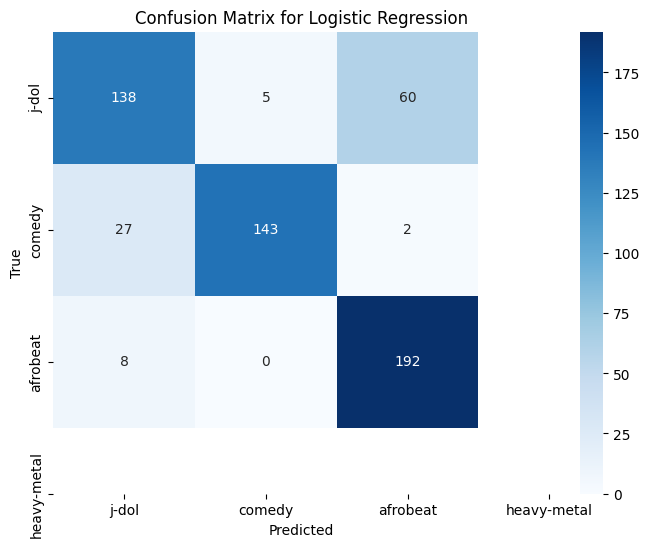

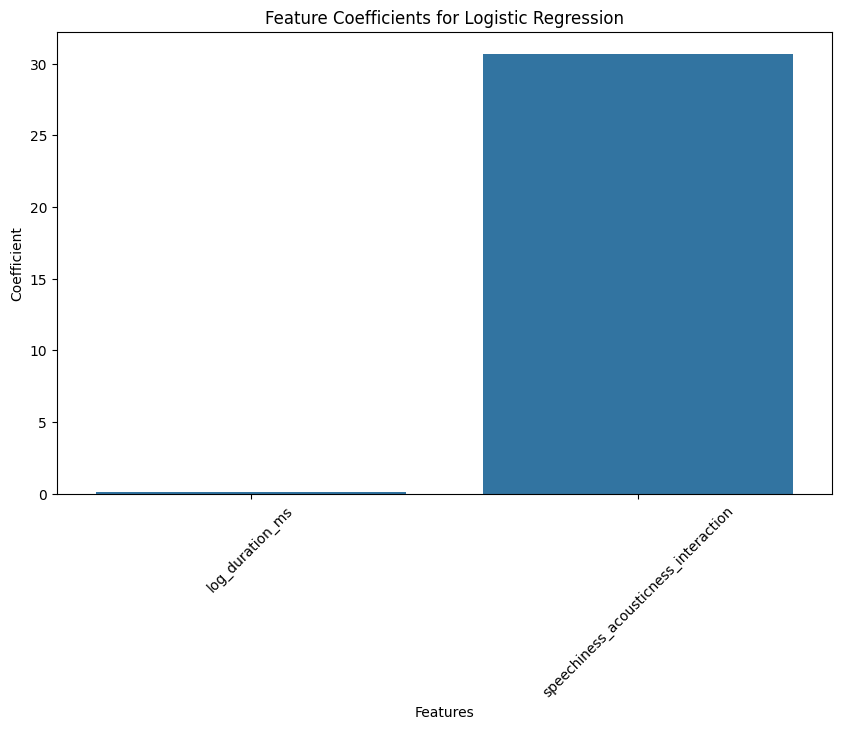


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Train Accuracy: 0.9217
Test Accuracy: 0.8400
F1 Score (Test): 0.8415


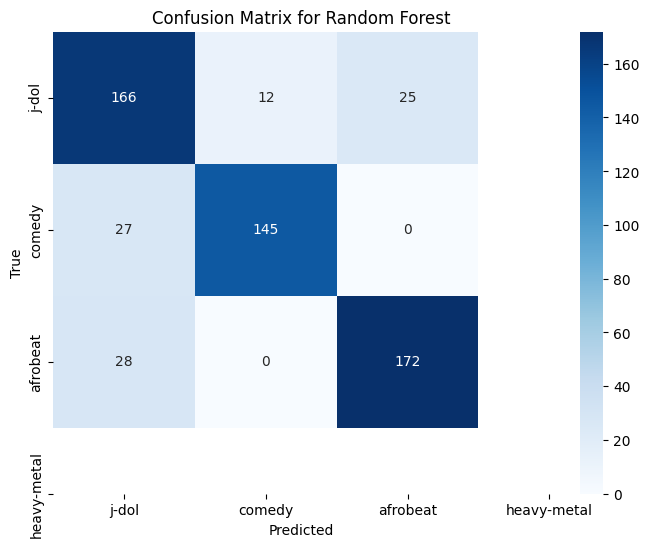

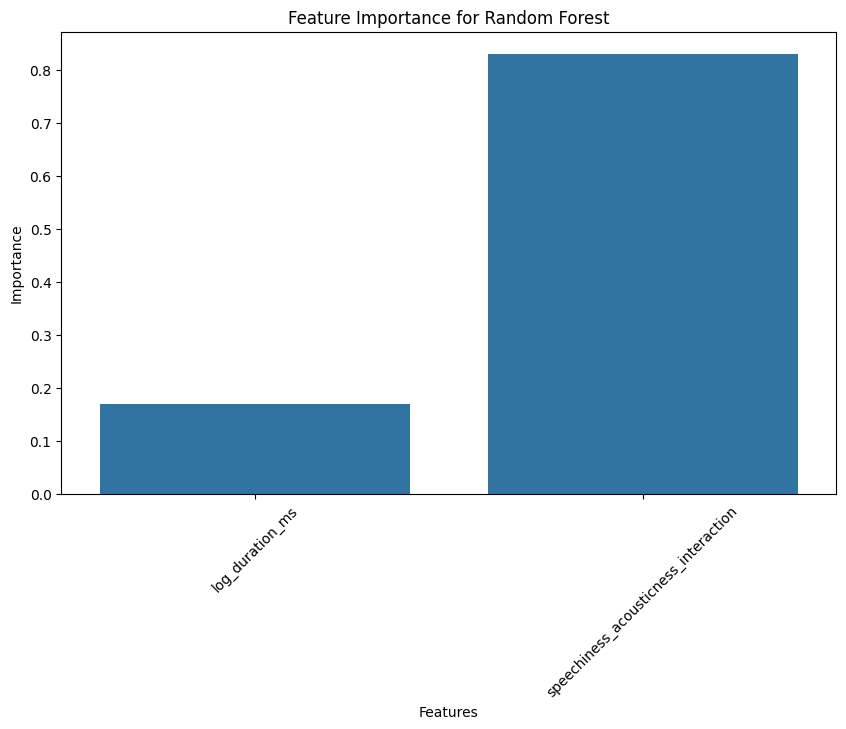


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Train Accuracy: 0.7900
Test Accuracy: 0.8000
F1 Score (Test): 0.7966


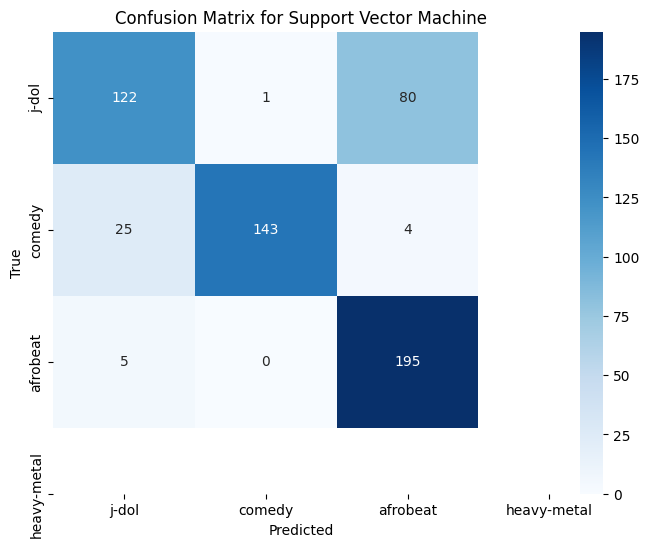

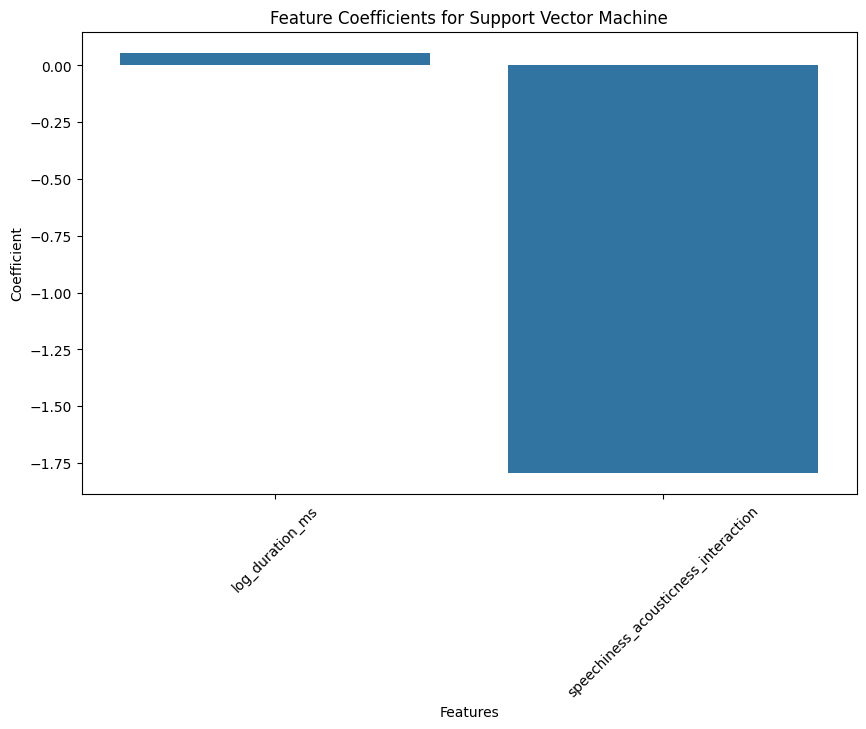


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9196
Test Accuracy: 0.8400
F1 Score (Test): 0.8414


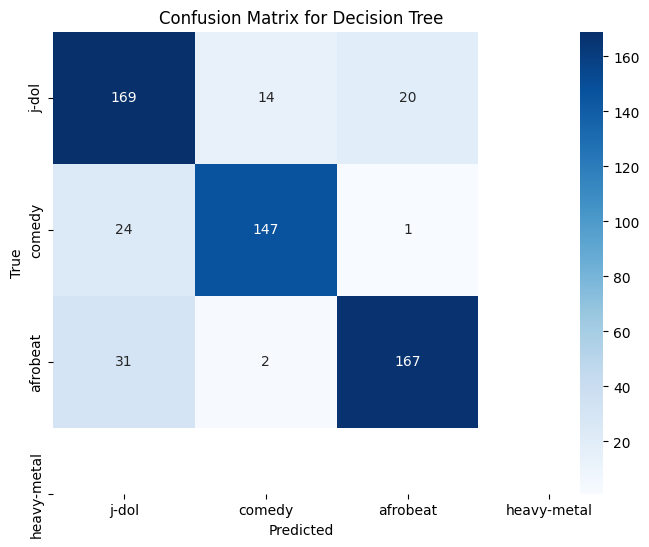

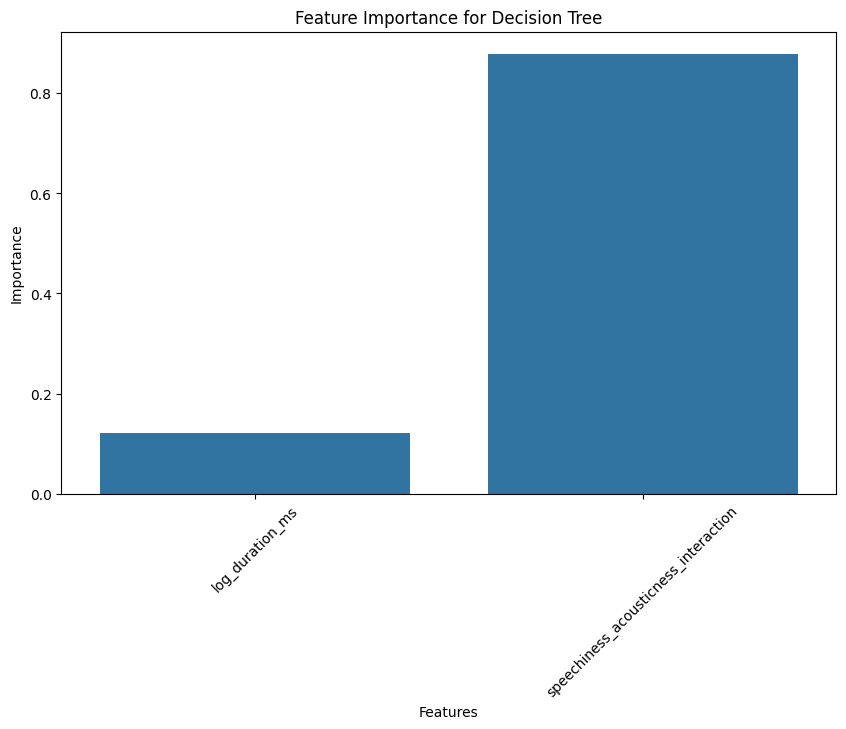


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.815217       0.822609         0.820693   
1           Random Forest        0.921739       0.840000         0.841502   
2  Support Vector Machine        0.790000       0.800000         0.796586   
3           Decision Tree        0.919565       0.840000         0.841396   

                                         Best Params  
0                             {'classifier__C': 100}  
1  {'classifier__max_depth': 10, 'classifier__n_e...  
2  {'classifier__C': 10, 'classifier__kernel': 'l...  
3                      {'classifier__max_depth': 10}  

Results saved to model_results4.csv


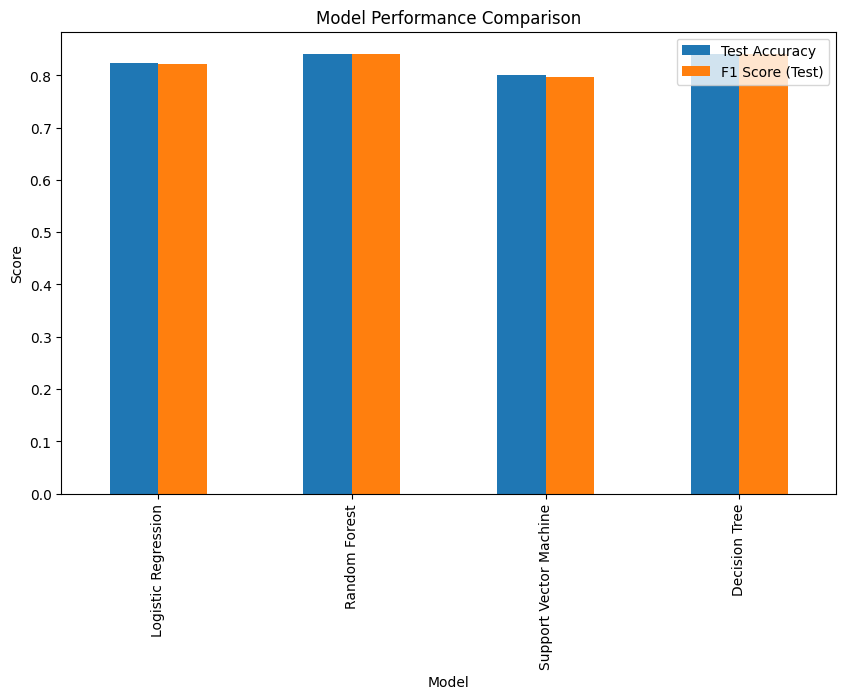

In [21]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define track genres to keep
    genres_to_keep = ['j-dol', 'comedy', 'afrobeat', 'heavy-metal']  # these are 4 of the top balanced genres

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['log_duration_ms', 'speechiness_acousticness_interaction', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature importance visualization
        if model_name == "Random Forest" or model_name == "Decision Tree":
            importance = best_model.named_steps['classifier'].feature_importances_
            plt.figure(figsize=(10, 6))
            sns.barplot(x=numeric_features, y=importance)
            plt.title(f'Feature Importance for {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.xticks(rotation=45)
            plt.show()

        elif model_name == "Logistic Regression" or (model_name == "Support Vector Machine" and grid_search.best_params_['classifier__kernel'] == 'linear'):
            importance = best_model.named_steps['classifier'].coef_[0]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=numeric_features, y=importance)
            plt.title(f'Feature Coefficients for {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Coefficient')
            plt.xticks(rotation=45)
            plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save the summary to a CSV file
    summary_df.to_csv('model_results4.csv', index=False)
    print("\nResults saved to model_results4.csv")

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


**Insights (so far..) for this multi class Problem:**

**Diverse Genres:** Different genres will naturally rely on different features. For example, instrumentals in rock or classical might matter more than in rap, where speechiness becomes key.

**Feature Importance by Genre:** Feature importance will vary across genres, so creating a general model that works for all might dilute the predictive power for specific genres.

**Class Balancing:** Balancing the data for underrepresented genres, particularly through resampling or algorithmic adjustments, is essential to get unbiased results.

## Comparing XGboost and Random Forest


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Train Accuracy: 0.9222
Test Accuracy: 0.8487
F1 Score (Test): 0.8503


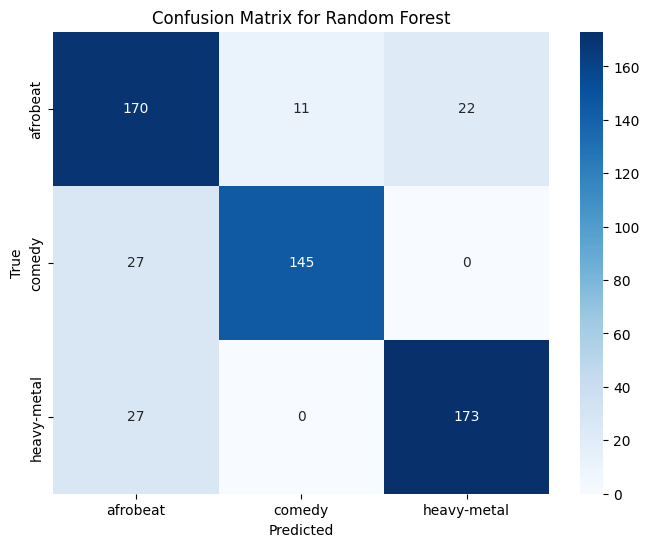

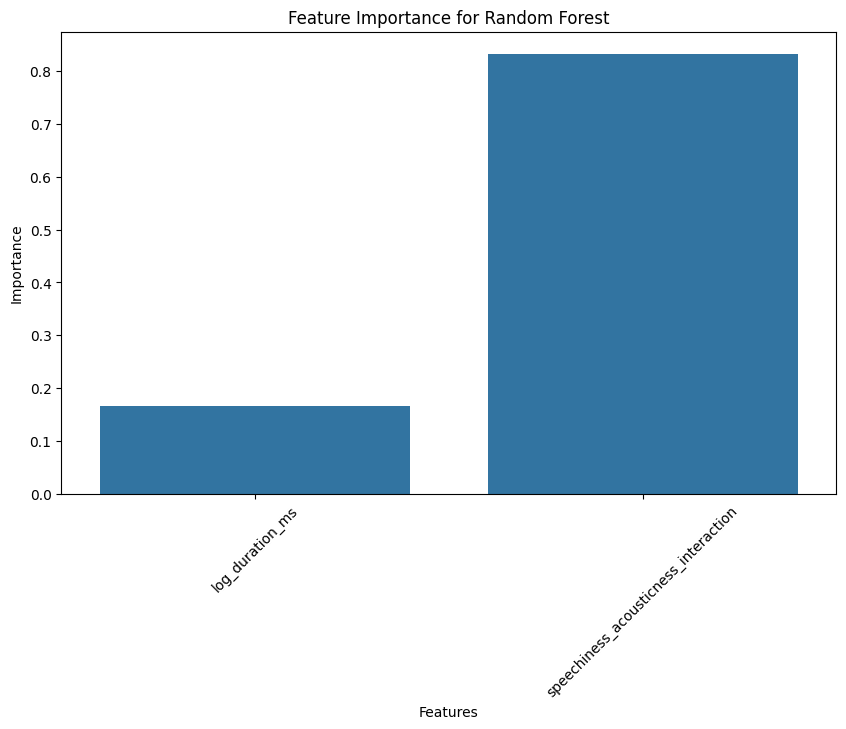


Evaluating model: XGBoost
Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
Train Accuracy: 0.8500
Test Accuracy: 0.8539
F1 Score (Test): 0.8553


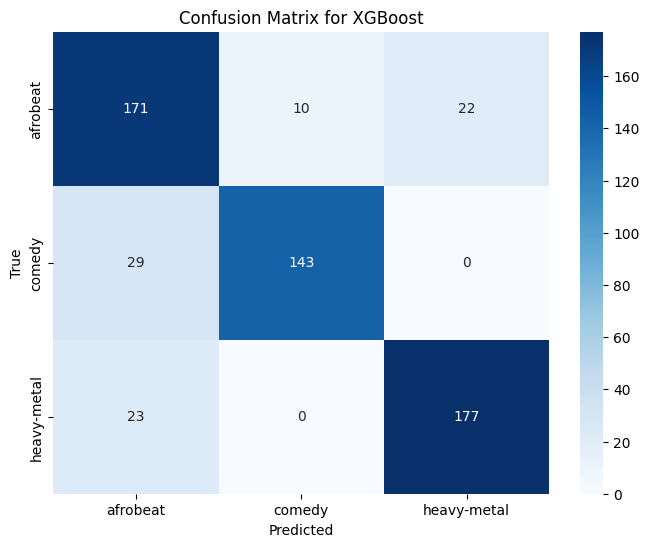

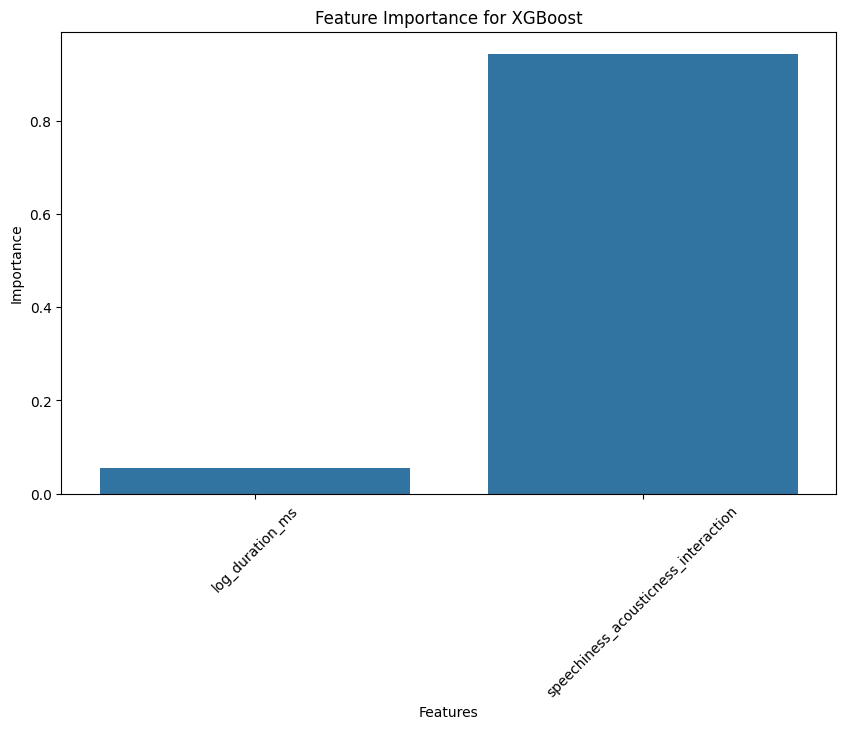


Model Comparison Summary:
           Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0  Random Forest        0.922174       0.848696         0.850265   
1        XGBoost        0.850000       0.853913         0.855262   

                                         Best Params  
0  {'classifier__max_depth': 10, 'classifier__n_e...  
1  {'classifier__learning_rate': 0.1, 'classifier...  

Results saved to model_results5.csv


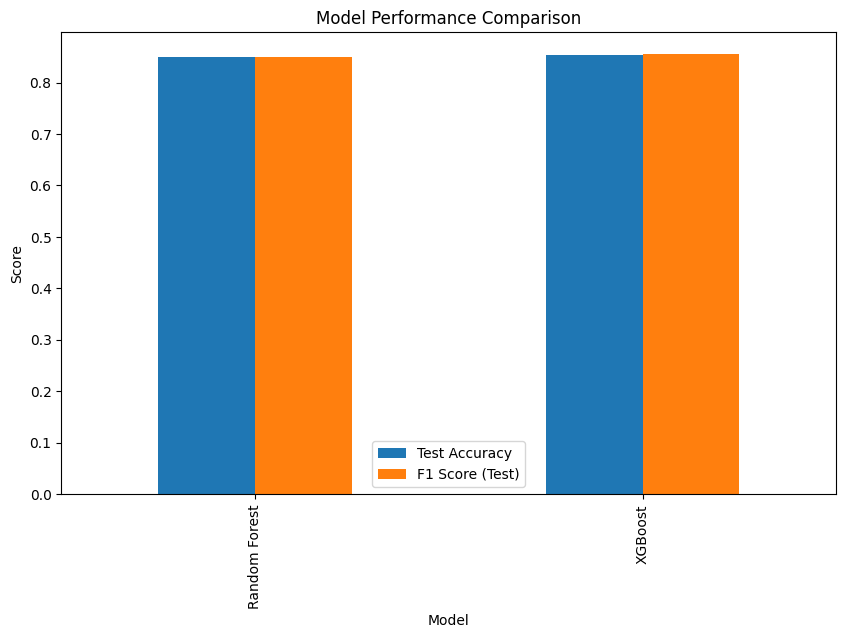

In [25]:
from sklearn.preprocessing import LabelEncoder

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define track genres to keep
    genres_to_keep = ['j-dol', 'comedy', 'afrobeat', 'heavy-metal']  # these are 4 of the top balanced genres

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['log_duration_ms', 'speechiness_acousticness_interaction', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Encode the target variable into numeric labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'XGBoost': {
            'model': xgb.XGBClassifier(),
            'params': {
                'classifier__learning_rate': [0.01, 0.1, 0.3],
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [3, 6, 10],
                'classifier__subsample': [0.8, 1.0]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Feature importance visualization for Random Forest and XGBoost
        if model_name == "Random Forest" or model_name == "XGBoost":
            importance = best_model.named_steps['classifier'].feature_importances_
            plt.figure(figsize=(10, 6))
            sns.barplot(x=numeric_features, y=importance)
            plt.title(f'Feature Importance for {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Importance')
            plt.xticks(rotation=45)
            plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save the summary to a CSV file
    summary_df.to_csv('model_results5.csv', index=False)
    print("\nResults saved to model_results5.csv")

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


# Modeling after Clustering multi classes

## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) After Clustering + SMOTE (balancing the clusters) - Since there are no specific features or engeneered features to diffrentiate between so many genres, it is possible that we could diffrentiate between clusters of genres related by similar features.

We'll cluster the track genres based on the engineered features: 'valence_binned', 'log_instrumentalness', 'log_duration_ms', 'energy_danceability_interaction', 'speechiness_acousticness_interaction', and 'tempo^2'. We'll start by visualizing these clusters using techniques like t-SNE or PCA to reduce dimensionality, so we can visualize the clusters in 2D or 3D space.

## Step 1: Visualizing Track Genre Clusters Using PCA (or t-SNE)

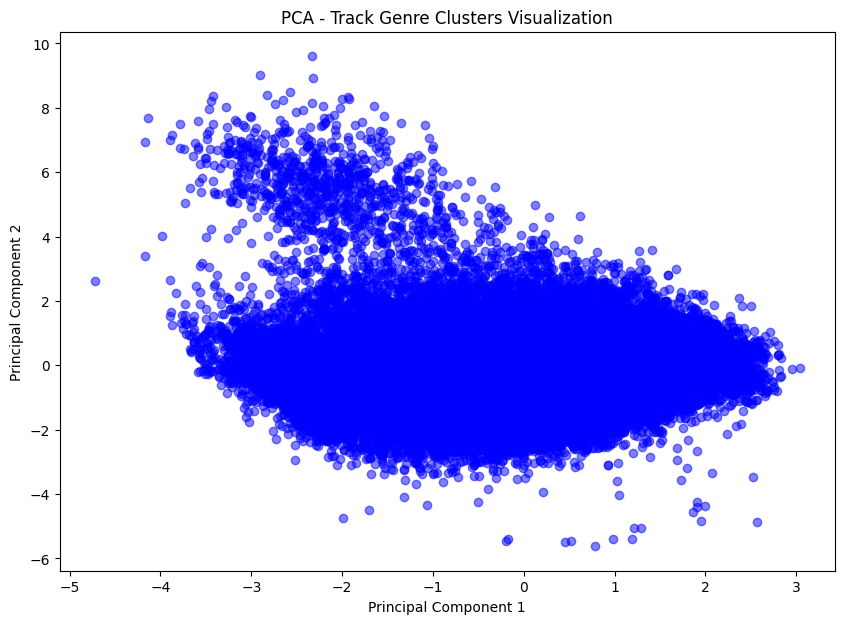

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df_cleaned = pd.read_csv(clean_engeneered_dataset)

# Selecting the engineered features for clustering
features = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
            'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']

# Convert `valence_binned` into categorical if not already
if df_cleaned['valence_binned'].dtype != 'category':
    df_cleaned['valence_binned'] = pd.Categorical(df_cleaned['valence_binned'])

# Convert binned categorical variables to numerical
df_cleaned['valence_binned'] = df_cleaned['valence_binned'].cat.codes

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

# Reduce the dimensionality using PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA - Track Genre Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Step 2: Applying K-Means Clustering

Once we visualize the PCA clusters, we can apply K-means clustering to group the track genres into 10 clusters (you can chose more or less clusters, we chose 10 for this experiment).

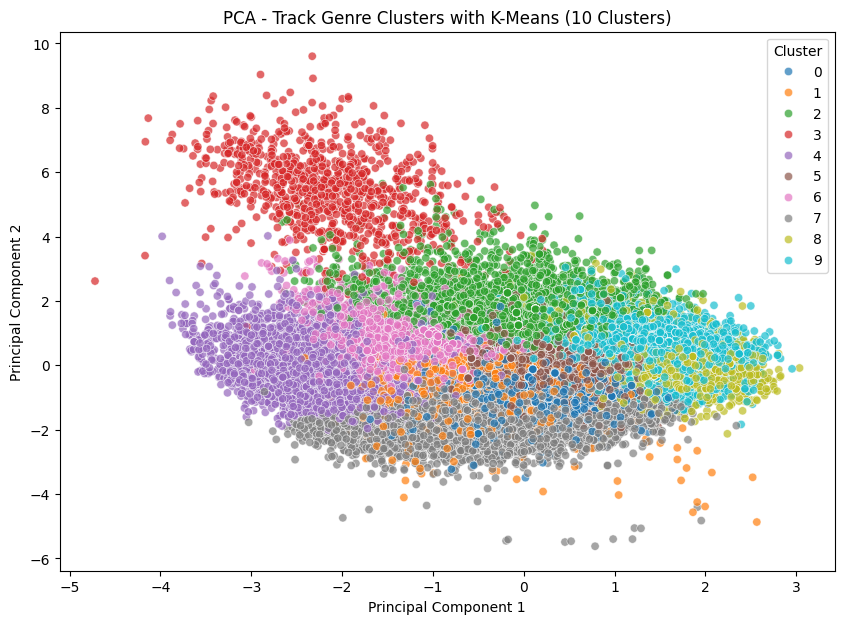

cluster
9    13646
5    13595
6     8863
1     8465
0     7928
7     7805
4     7337
8     6395
2     5454
3      917
Name: count, dtype: int64


In [27]:
from sklearn.cluster import KMeans

# Applying KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means clusters using PCA
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['cluster'], palette='tab10', alpha=0.7)
plt.title('PCA - Track Genre Clusters with K-Means (10 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# View cluster counts
cluster_counts = df_cleaned['cluster'].value_counts()
print(cluster_counts)

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# If you haven't defined the PCA yet, redo it here:
# Assuming df_cleaned is the dataset with your engineered features
pca = PCA(n_components=2)  # Keeping 2 components for visualization
df_pca = pca.fit_transform(df_cleaned[['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                                       'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']])

# Now fit the K-Means model
n_clusters = 10  # Assuming you want 10 clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(df_pca)

# Get the labels from the K-Means model
kmeans_labels = kmeans_model.labels_

# Add the K-Means cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans_labels

# Group by the cluster labels and get the corresponding track_genres
clustered_genres = df_cleaned.groupby('Cluster')['track_genre'].apply(list)

# To show how many unique genres are in each cluster
clustered_genres_summary = df_cleaned.groupby('Cluster')['track_genre'].nunique()

# Print results
print("Genres in each cluster:")
for cluster, genres in clustered_genres.items():
    print(f"Cluster {cluster}:")
    print(genres[:10], '...')  # Printing the first 10 genres for brevity

# If you want a summary of how many genres are in each cluster
print("\nNumber of unique genres in each cluster:")
print(clustered_genres_summary)


Genres in each cluster:
Cluster 0:
['pop', 'pop', 'latin', 'pop', 'country', 'latino', 'latino', 'pop', 'indie', 'reggae'] ...
Cluster 1:
['reggae', 'dance', 'latin', 'pop', 'pop', 'rock', 'pop', 'pop', 'pop', 'pop'] ...
Cluster 2:
['piano', 'hip-hop', 'rock', 'pop', 'pop', 'garage', 'dance', 'alternative', 'emo', 'indie-pop'] ...
Cluster 3:
['latino', 'garage', 'hip-hop', 'funk', 'indie', 'pop', 'soul', 'dance', 'pop', 'rock'] ...
Cluster 4:
['pop', 'latino', 'alternative', 'emo', 'hip-hop', 'j-pop', 'country', 'dance', 'hip-hop', 'alt-rock'] ...
Cluster 5:
['latino', 'hard-rock', 'indie-pop', 'singer-songwriter', 'indie-pop', 'dance', 'pop', 'alt-rock', 'reggaeton', 'soul'] ...
Cluster 6:
['latin', 'latino', 'latin', 'dance', 'pop', 'latin', 'piano', 'pop', 'hip-hop', 'hip-hop'] ...
Cluster 7:
['dance', 'hip-hop', 'edm', 'latin', 'alt-rock', 'latin', 'chill', 'dance', 'latino', 'groove'] ...
Cluster 8:
['pop', 'hip-hop', 'dance', 'hip-hop', 'latino', 'latino', 'pop', 'pop', 'reggae',

## Model training result after Clustering (this is done over the entire 114 classes and all engeneered features)

First few rows of the dataset:
                              track_name                track_id  \
0              Unholy (feat. Kim Petras)  3nqQXoyQOWXiESFLlDF1hG   
1  Quevedo: Bzrp Music Sessions, Vol. 52  2tTmW7RDtMQtBk7m2rYeSw   
2                        I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
3                             La Bachata  5ww2BF9slyYgNOk37BlC4u   
4                        Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx   

                      artists                             album_name  \
0        Sam Smith;Kim Petras              Unholy (feat. Kim Petras)   
1            Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52   
2     David Guetta;Bebe Rexha                        I'm Good (Blue)   
3               Manuel Turizo                             La Bachata   
4  Bad Bunny;Chencho Corleone                       Un Verano Sin Ti   

   popularity  duration_ms  explicit  danceability  energy  key  ...  \
0       100.0     156943.0     False         0.714   0.

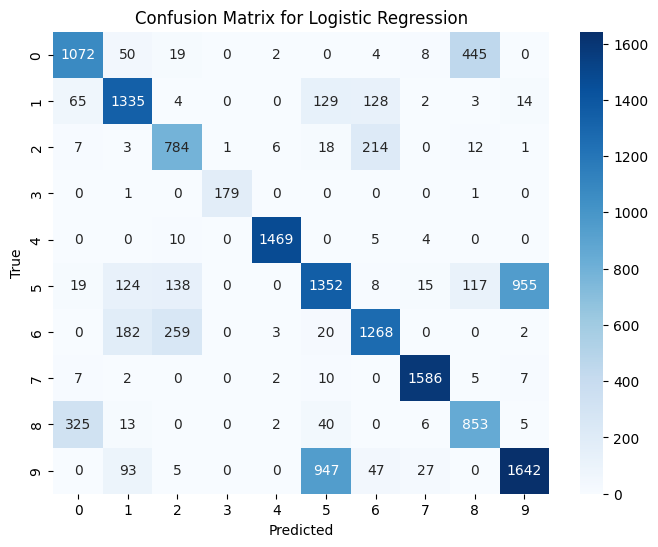


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Train Accuracy: 1.0000
Test Accuracy: 0.7613
F1 Score (Test): 0.7595


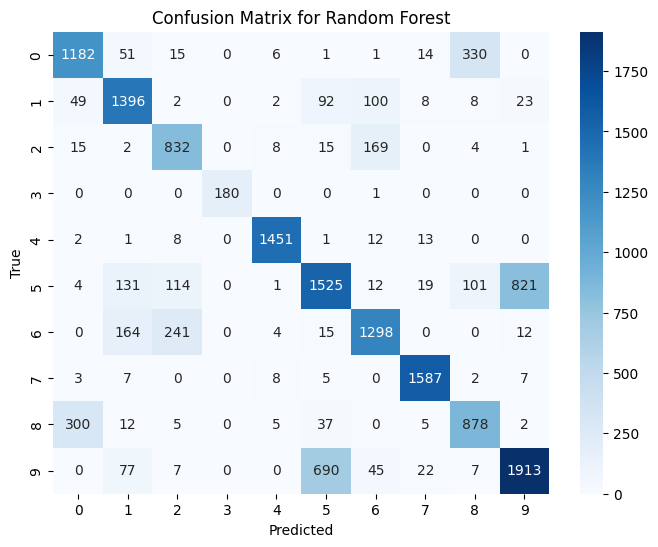


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.7986
Test Accuracy: 0.7287
F1 Score (Test): 0.7260


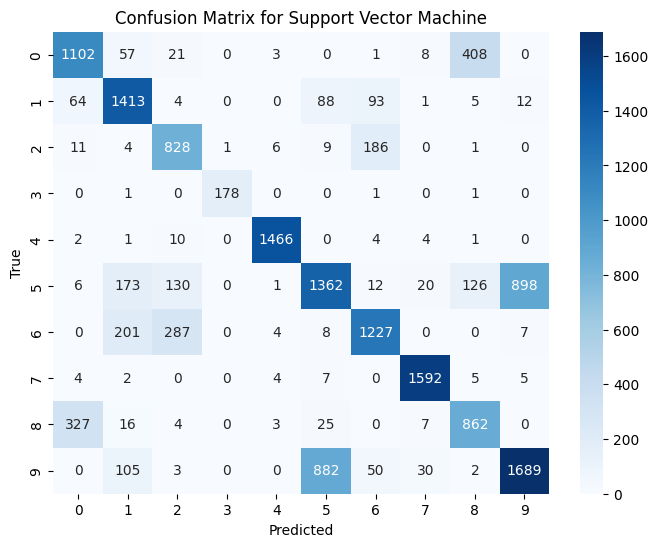


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 20}
Train Accuracy: 0.9359
Test Accuracy: 0.7123
F1 Score (Test): 0.7121


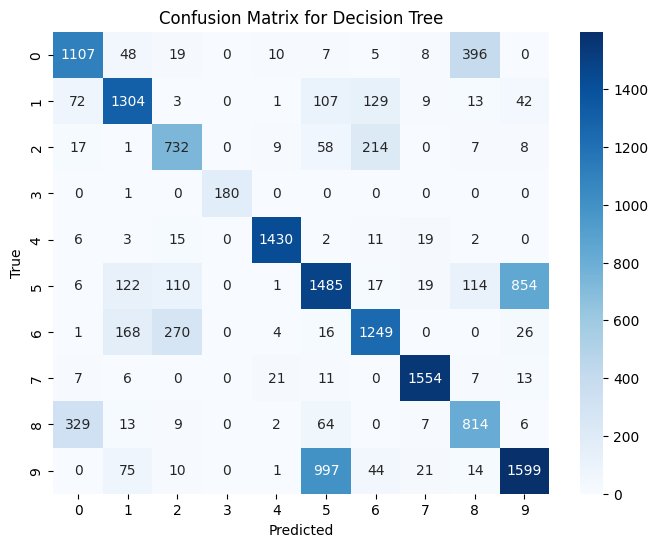


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.782453       0.717617         0.716047   
1           Random Forest        1.000000       0.761271         0.759472   
2  Support Vector Machine        0.798650       0.728748         0.726028   
3           Decision Tree        0.935866       0.712269         0.712053   

                                         Best Params  
0                              {'classifier__C': 10}  
1  {'classifier__max_depth': None, 'classifier__n...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 20}  

Results saved to model_results6.csv


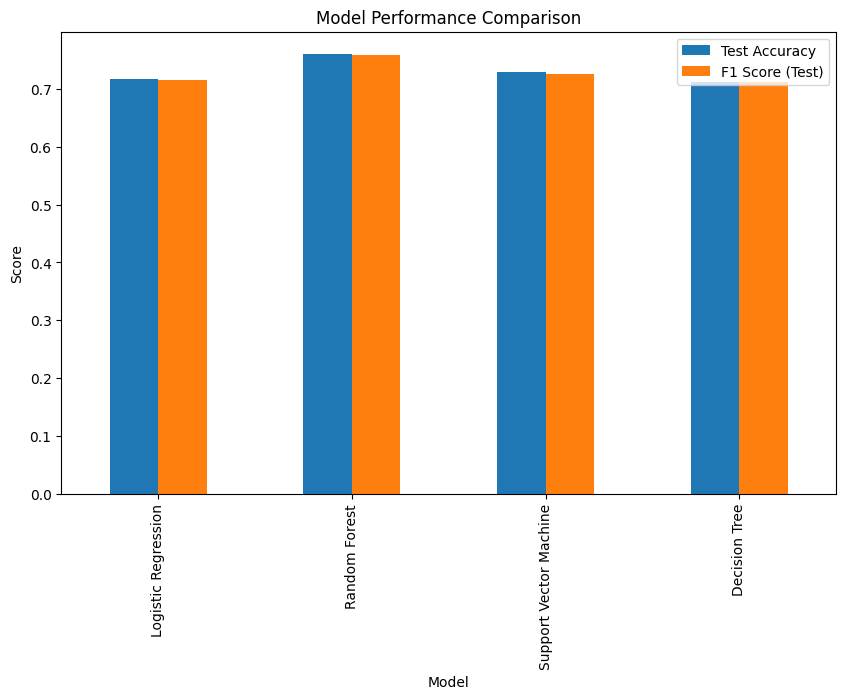

In [30]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Keep only the specified columns
    columns_to_keep = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                       'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2', 'track_genre']
    df_subset = df[columns_to_keep]

    # Feature Engineering: PCA + KMeans to create new target (Cluster)
    features = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']

    # Convert `valence_binned` into categorical if not already
    if df_subset['valence_binned'].dtype != 'category':
        df_subset['valence_binned'] = pd.Categorical(df_subset['valence_binned'])

    # Convert binned categorical variables to numerical
    df_subset['valence_binned'] = df_subset['valence_binned'].cat.codes

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_subset[features])

    # Apply KMeans for clustering
    kmeans = KMeans(n_clusters=10, random_state=42)
    df_subset['Cluster'] = kmeans.fit_predict(X_scaled)

    # Define target and features (new target is 'Cluster')
    target_column = 'Cluster'
    X = df_subset.drop(['track_genre', target_column], axis=1)
    y = df_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train_resampled)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Convert the summary list to a DataFrame
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save the summary to a CSV file
    summary_df.to_csv('model_results6.csv', index=False)
    print("\nResults saved to model_results6.csv")

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)


**Insights from the clusters of track_genres made scientifically (rather than based on knowledge about music):**

There is some separation between clusters as visualized over the engeneered featured suggested in the algorithm. However, the fact that each cluster contains 114 unique track genres (except Clusters 4,5,8) suggests that genre separation is not strong in the dataset.

**1. Cluster Separation -** The large variation in the number of points (Cluster 3 with 13,595 points vs. Cluster 3 with only 917 points) also shows that certain clusters are more "attractive" or dense, meaning they share more common characteristics.

**2. Genre Overlap Across Clusters -** Despite the difference in the number of data points per cluster, the number of unique genres in each cluster remains consistently high (114 for most clusters). This suggests that genre is not a primary feature driving the clustering. Instead, the clustering might be based on other factors like tempo, acoustics, or mood, which don’t necessarily align with genre divisions.

In other words, while the clusters themselves are distinct in some ways, the track genres are spread across these clusters. This is likely why we're seeing 114 genres in most clusters—genres are not the key differentiator for the clustering algorithm, so they appear in multiple clusters.

We might consider incorporating more genre-specific features or using a clustering algorithm that is better at capturing such distinctions if your goal is to achieve better genre separation. **But lets leave it for now and just focus on finding the best model scientifically suitable (we can allways improve the clustering in other projects).**

# Ensemble Random Forest and then XGboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Define target and features
    target_column = 'track_genre_encoded'  # Replace with your actual target column name
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Encode the target variable into numeric labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features)]
    )

    # Base models for the stacking classifier
    base_learners = [
        ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgboost', xgb.XGBClassifier(random_state=42))
    ]

    # Final meta-model (XGBoost)
    final_estimator = xgb.XGBClassifier(random_state=42)

    # StackingClassifier that combines Random Forest and XGBoost
    model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator)

    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('stacking', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate and print metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")

    # Store results in the summary
    summary = [{
        'Model': 'Ensemble of Random Forest and XGBoost (Stacking)',
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'F1 Score (Test)': f1_test,
        'Best Params': 'N/A'  # No specific hyperparameters as it is an ensemble model
    }]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix for Ensemble Model')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Feature importance visualization for Random Forest and XGBoost
    importance = pipeline.named_steps['stacking'].named_estimators_['random_forest'].feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=numeric_features, y=importance)
    plt.title('Feature Importance for Random Forest (Base Learner)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

    importance = pipeline.named_steps['stacking'].named_estimators_['xgboost'].feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=numeric_features, y=importance)
    plt.title('Feature Importance for XGBoost (Base Learner)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

    # Save the summary to a CSV file
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Save the results to model_results7.csv
    summary_df.to_csv('model_results7.csv', index=False)
    print("\nResults saved to model_results7.csv")

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main(clean_engeneered_dataset)
